In [37]:
import numpy as np
import pandas as pd
import torch
import tqdm
from sklearn.metrics import r2_score
import random
import tensorflow as tf
import os

os.environ['PYTHONHASHSEED'] = '42' # 固定 Python 系統隨機種子
random.seed(42) # 固定 Python 隨機模組
np.random.seed(42) # 固定 NumPy 隨機模組
tf.random.set_seed(42) # 固定 Tensorflow 隨機模組

In [17]:
df = pd.read_excel(r"C:\Users\Jacky\碩一 統計資訊\失業率資料_2.xlsx")

df.isna().sum()
df = df.iloc[:, 1:]

print(df.head())

   村里鄰戶數暨人口數_人口數(人)  每人每月總薪資_工業及服務業(元)  每人每月總薪資_工業部門(元)  每人每月總薪資_服務業部門(元)  \
0          22414047              53928            52486             55312   
1          22421793              55848            50166             61266   
2          22429972              38293            35356             41100   
3          22440435              38656            35799             41395   
4          22448817              38765            36729             40727   

   每人每月經常性薪資_工業及服務業(元)  每人每月經常性薪資_工業部門(元)  每人每月經常性薪資_服務業部門(元)  \
0                35049              32436               37557   
1                33996              31022               36832   
2                34712              32155               37156   
3                34947              32245               37536   
4                34858              32460               37168   

   受僱員工人數_工業及服務業(人)  受僱員工人數_工業部門(人)  受僱員工人數_服務業部門(人)  ...  \
0           5584956         2735481          2849475  ...   
1           5578841     

## 隨機森林初步篩選變數

In [18]:
# 篩選變數
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['失業率(%)_合計'])
y = df['失業率(%)_合計']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20).index.tolist()

print("隨機森林選出的變數：", top_features)

df = df[top_features + ['失業率(%)_合計']]
df.head()

隨機森林選出的變數： ['各國證券市場股價指數比較_日本日經225', '各國證券市場股價指數比較_美國道瓊工業指數', '公開發行公司股票發行概況_其他公開發行公司-家數-興櫃股票(家)', '上市股票平均每股市值及獲利概況_平均每股盈餘(新臺幣元)', '票券市場統計-按交易金額工具別(新臺幣百萬元)_可轉讓定期存單_賣出', '上市股票平均每股市值及獲利概況_本益比(倍)', '外匯統計-我國與主要貿易對手通貨對美元之匯率_英鎊 (USD/GBP)', '公開發行公司股票發行概況_其他公開發行公司-資本額-興櫃股票(十億元)', '外匯統計-外匯交易量、淨部位及外匯存底-月_銀行對顧客市場-小計(美金百萬元)', '受僱員工人數_工業部門(人)', '全體銀行存款餘額統計-科目別_定期儲蓄存款(新台幣百萬元)', '全體銀行存款餘額統計-科目別_機關存款(新台幣百萬元)', '公開發行公司股票發行概況_上櫃公司-上櫃面值(十億元)', '受僱員工人數_服務業部門(人)', '各國證券市場股價指數比較_倫敦金融時報', '全體銀行存款餘額統計-科目別_政府存款-計(新台幣百萬元)', '全體銀行存款餘額統計-科目別_外匯定期存款(新台幣百萬元)', '外匯統計-即期匯率_歐元(新台幣元)_買入', '外匯統計-即期匯率_歐元(新台幣元)_賣出', '外匯統計-我國與主要貿易對手通貨對美元之匯率_日圓 (JPY/USD)']


,各國證券市場股價指數比較_日本日經225,各國證券市場股價指數比較_美國道瓊工業指數,公開發行公司股票發行概況_其他公開發行公司-家數-興櫃股票(家),上市股票平均每股市值及獲利概況_平均每股盈餘(新臺幣元),票券市場統計-按交易金額工具別(新臺幣百萬元)_可轉讓定期存單_賣出,上市股票平均每股市值及獲利概況_本益比(倍),外匯統計-我國與主要貿易對手通貨對美元之匯率_英鎊 (USD/GBP),公開發行公司股票發行概況_其他公開發行公司-資本額-興櫃股票(十億元),外匯統計-外匯交易量、淨部位及外匯存底-月_銀行對顧客市場-小計(美金百萬元),受僱員工人數_工業部門(人),...,全體銀行存款餘額統計-科目別_機關存款(新台幣百萬元),公開發行公司股票發行概況_上櫃公司-上櫃面值(十億元),受僱員工人數_服務業部門(人),各國證券市場股價指數比較_倫敦金融時報,全體銀行存款餘額統計-科目別_政府存款-計(新台幣百萬元),全體銀行存款餘額統計-科目別_外匯定期存款(新台幣百萬元),外匯統計-即期匯率_歐元(新台幣元)_買入,外匯統計-即期匯率_歐元(新台幣元)_賣出,外匯統計-我國與主要貿易對手通貨對美元之匯率_日圓 (JPY/USD),失業率(%)_合計
0,9997.80,9920.00,88,0.62,200696,44.08,1.4323,41.52,1804,2735481,...,672797,679.07,2849475,5164.8,692948,788042,29.89,30.29,132.66,5.14
1,10587.83,10106.13,80,0.62,132047,42.68,1.4225,38.25,2246,2722780,...,646227,689.42,2856061,5101.0,658723,815614,30.19,30.59,133.52,5.12
2,11024.94,10403.94,65,0.63,161322,45.77,1.4224,32.42,2140,2730705,...,645689,695.39,2857770,5271.8,660578,832563,30.33,30.74,131.20,5.16
3,11492.54,9946.22,64,0.52,137786,55.36,1.4426,32.29,2082,2739805,...,647061,698.80,2857766,5165.6,671185,795397,31.16,31.56,131.07,4.98
4,11763.70,9925.25,80,0.54,165050,52.38,1.4593,57.24,2283,2750603,...,662956,695.63,2856127,5085.1,695273,772704,31.85,32.25,126.48,5.02


In [19]:
from sklearn.preprocessing import MinMaxScaler

train_size = 200
train = df.iloc[:train_size]
test = df.iloc[train_size:]

scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns=df.columns)
test = pd.DataFrame(scaler.transform(test), columns=df.columns)

train.head()

,各國證券市場股價指數比較_日本日經225,各國證券市場股價指數比較_美國道瓊工業指數,公開發行公司股票發行概況_其他公開發行公司-家數-興櫃股票(家),上市股票平均每股市值及獲利概況_平均每股盈餘(新臺幣元),票券市場統計-按交易金額工具別(新臺幣百萬元)_可轉讓定期存單_賣出,上市股票平均每股市值及獲利概況_本益比(倍),外匯統計-我國與主要貿易對手通貨對美元之匯率_英鎊 (USD/GBP),公開發行公司股票發行概況_其他公開發行公司-資本額-興櫃股票(十億元),外匯統計-外匯交易量、淨部位及外匯存底-月_銀行對顧客市場-小計(美金百萬元),受僱員工人數_工業部門(人),...,全體銀行存款餘額統計-科目別_機關存款(新台幣百萬元),公開發行公司股票發行概況_上櫃公司-上櫃面值(十億元),受僱員工人數_服務業部門(人),各國證券市場股價指數比較_倫敦金融時報,全體銀行存款餘額統計-科目別_政府存款-計(新台幣百萬元),全體銀行存款餘額統計-科目別_外匯定期存款(新台幣百萬元),外匯統計-即期匯率_歐元(新台幣元)_買入,外匯統計-即期匯率_歐元(新台幣元)_賣出,外匯統計-我國與主要貿易對手通貨對美元之匯率_日圓 (JPY/USD),失業率(%)_合計
0,0.156433,0.149691,0.080000,0.152824,0.523644,0.302844,0.241535,0.024413,0.002939,0.018590,...,0.525190,0.578527,0.000000,0.382029,0.487516,0.058947,0.000000,0.000000,0.984846,0.605578
1,0.194426,0.159443,0.053333,0.152824,0.339228,0.290741,0.229892,0.015764,0.049333,0.000000,...,0.422316,0.652413,0.003864,0.366771,0.366974,0.069082,0.016340,0.016340,1.000000,0.597610
2,0.222572,0.175046,0.003333,0.156146,0.417871,0.317455,0.229773,0.000344,0.038207,0.011600,...,0.420233,0.695031,0.004867,0.407619,0.373507,0.075313,0.023965,0.024510,0.959119,0.613546
3,0.252682,0.151065,0.000000,0.119601,0.354645,0.400363,0.253772,0.000000,0.032119,0.024919,...,0.425545,0.719375,0.004865,0.382220,0.410866,0.061651,0.069172,0.069172,0.956828,0.541833
4,0.270143,0.149966,0.053333,0.126246,0.427886,0.374600,0.273613,0.065991,0.053217,0.040724,...,0.487088,0.696745,0.003903,0.362968,0.495705,0.053309,0.106754,0.106754,0.875947,0.557769


In [20]:
n = 12  # 使用過去 12 筆資料預測下一筆

# 排除目標欄位，只保留特徵欄位
feature_names = list(train.drop(columns=['失業率(%)_合計']).columns)

X = []
y = []
indexes = []

norm_data_x = train[feature_names]

for i in tqdm.tqdm(range(0, len(train) - n)):
    X.append(norm_data_x.iloc[i:i+n].values)            # 前 12 筆特徵
    y.append(train['失業率(%)_合計'].iloc[i + n])        # 第 13 筆目標值
    indexes.append(train.index[i + n])                  # 時間索引

# 轉為 numpy 陣列（供 LSTM 使用）
X = np.array(X)
y = np.array(y)

100%|██████████| 188/188 [00:00<00:00, 62507.27it/s]


In [21]:
# 查看資料形態
print(X[0])
print(y[0])

[[1.56432733e-01 1.49690933e-01 8.00000000e-02 1.52823920e-01
  5.23643993e-01 3.02844298e-01 2.41534989e-01 2.44128227e-02
  2.93901543e-03 1.85902118e-02 0.00000000e+00 5.25189912e-01
  5.78526556e-01 0.00000000e+00 3.82028814e-01 4.87516069e-01
  5.89470852e-02 0.00000000e+00 0.00000000e+00 9.84845815e-01]
 [1.94425968e-01 1.59442872e-01 5.33333333e-02 1.52823920e-01
  3.39228101e-01 2.90740901e-01 2.29891885e-01 1.57638595e-02
  4.93334733e-02 0.00000000e+00 1.03273118e-02 4.22316264e-01
  6.52412907e-01 3.86448372e-03 3.66770620e-01 3.66973673e-01
  6.90824637e-02 1.63398693e-02 1.63398693e-02 1.00000000e+00]
 [2.22572372e-01 1.75046080e-01 3.33333333e-03 1.56146179e-01
  4.17871275e-01 3.17454828e-01 2.29773078e-01 3.43842573e-04
  3.82072006e-02 1.15996715e-02 1.07933328e-02 4.20233237e-01
  6.95031411e-01 4.86727793e-03 4.07618574e-01 3.73507088e-01
  7.53128616e-02 2.39651416e-02 2.45098039e-02 9.59118943e-01]
 [2.52682089e-01 1.51064681e-01 0.00000000e+00 1.19601329e-01
  3.5

In [22]:
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(188, 12, 20)
(188,)


In [23]:
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout

n_steps = 12 # 時間步長
n_features = 20 # 每個時間點有幾個特徵需要做輸入

model = Sequential()
model.add(LSTM(10, activation='relu', return_sequences=False, input_shape=(n_steps, n_features)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mape'])

c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
history = model.fit(X, y, batch_size=16, epochs=100)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2486 - mape: 4960785.0000 - mse: 0.2486   
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1051 - mape: 288778.8750 - mse: 0.1051  
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0944 - mape: 1986840.7500 - mse: 0.0944 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0760 - mape: 1225094.5000 - mse: 0.0760 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0667 - mape: 3175404.5000 - mse: 0.0667  
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0603 - mape: 1508585.8750 - mse: 0.0603 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0498 - mape: 957970.3125 - mse: 0.0498  
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0514 - mape: 753522.1250 - mse: 0.0514  
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0417 - mape: 2562360.5000 - mse: 0.0417  
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0434 - mape: 412

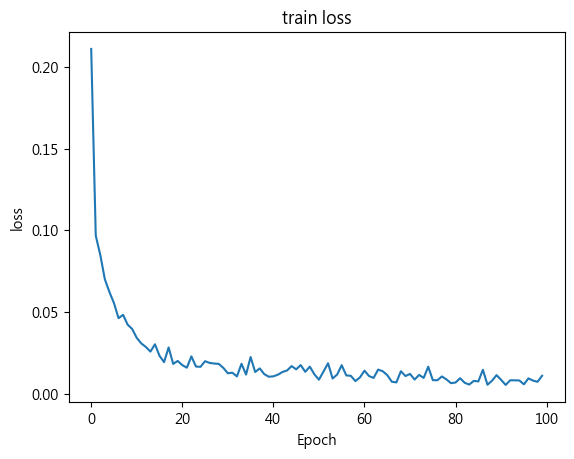

In [25]:
import matplotlib.pyplot as plt
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(history.history["loss"])

In [26]:
feature_names = list(test.drop('失業率(%)_合計', axis=1).columns)
X = []
y = []
indexes = []
norm_data_x = test[feature_names]
for i in tqdm.tqdm(range(0, len(test) - n)):
    X.append(norm_data_x.iloc[i:i+n].values)
    y.append(test['失業率(%)_合計'].iloc[i+n-1]) 
    indexes.append(test.index[i+n-1])
X = np.array(X)
y = np.array(y)



predictions = model.predict(X)
predictions = pd.DataFrame(predictions).rename(columns={0: '預測值'})
Y_test = pd.DataFrame(y).rename(columns={0: '實際值'})

final = pd.concat([predictions, Y_test], axis=1)
final['mae'] = abs(final['預測值'] - final['實際值'])
final.head()


100%|██████████| 64/64 [00:00<00:00, 63989.38it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


,預測值,實際值,mae
0,0.111176,0.107570,0.003606
1,0.120635,0.071713,0.048921
2,0.113837,0.059761,0.054076
3,0.114057,0.043825,0.070232
4,0.115495,0.019920,0.095575


## 最佳模型

隨機森林選出的變數： ['各國證券市場股價指數比較_日本日經225', '各國證券市場股價指數比較_美國道瓊工業指數', '公開發行公司股票發行概況_其他公開發行公司-家數-興櫃股票(家)', '上市股票平均每股市值及獲利概況_平均每股盈餘(新臺幣元)', '票券市場統計-按交易金額工具別(新臺幣百萬元)_可轉讓定期存單_賣出', '上市股票平均每股市值及獲利概況_本益比(倍)', '外匯統計-我國與主要貿易對手通貨對美元之匯率_英鎊 (USD/GBP)', '公開發行公司股票發行概況_其他公開發行公司-資本額-興櫃股票(十億元)', '外匯統計-外匯交易量、淨部位及外匯存底-月_銀行對顧客市場-小計(美金百萬元)', '受僱員工人數_工業部門(人)', '全體銀行存款餘額統計-科目別_定期儲蓄存款(新台幣百萬元)', '全體銀行存款餘額統計-科目別_機關存款(新台幣百萬元)', '公開發行公司股票發行概況_上櫃公司-上櫃面值(十億元)', '受僱員工人數_服務業部門(人)', '各國證券市場股價指數比較_倫敦金融時報', '全體銀行存款餘額統計-科目別_政府存款-計(新台幣百萬元)', '全體銀行存款餘額統計-科目別_外匯定期存款(新台幣百萬元)', '外匯統計-即期匯率_歐元(新台幣元)_買入', '外匯統計-即期匯率_歐元(新台幣元)_賣出', '外匯統計-我國與主要貿易對手通貨對美元之匯率_日圓 (JPY/USD)']


100%|██████████| 64/64 [00:00<00:00, 63989.38it/s]

Epoch 1/100



c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1244 - mape: 906961.3125 - mse: 0.1244 - val_loss: 0.1762 - val_mape: 8841970.0000 - val_mse: 0.1762
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0831 - mape: 5901052.0000 - mse: 0.0831 - val_loss: 0.0752 - val_mape: 6171305.5000 - val_mse: 0.0752
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0626 - mape: 4569222.5000 - mse: 0.0626 - val_loss: 0.0255 - val_mape: 3695805.2500 - val_mse: 0.0255
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0471 - mape: 1833342.8750 - mse: 0.0471 - val_loss: 0.0263 - val_mape: 3327576.2500 - val_mse: 0.0263
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0454 - mape: 2797996.2500 - mse: 0.0454 - val_loss: 0.0205 - val_mape: 2716242.0000 - val_mse: 0.0205
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0331 - mape: 1514179.6250 - mse: 0.0331 - val_loss: 0.0126 - val_mape: 1782129.6250 - val_mse: 0.0126
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━

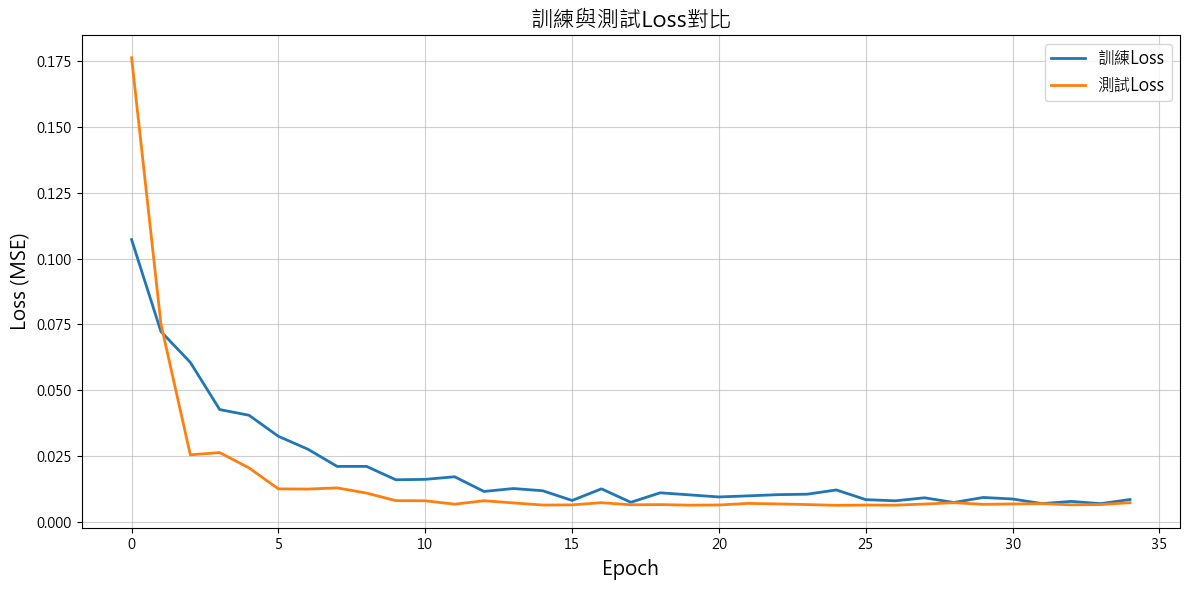

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
MAE: 0.1306
RMSE: 0.1994
MAPE: 3.39%
R²: 0.4722


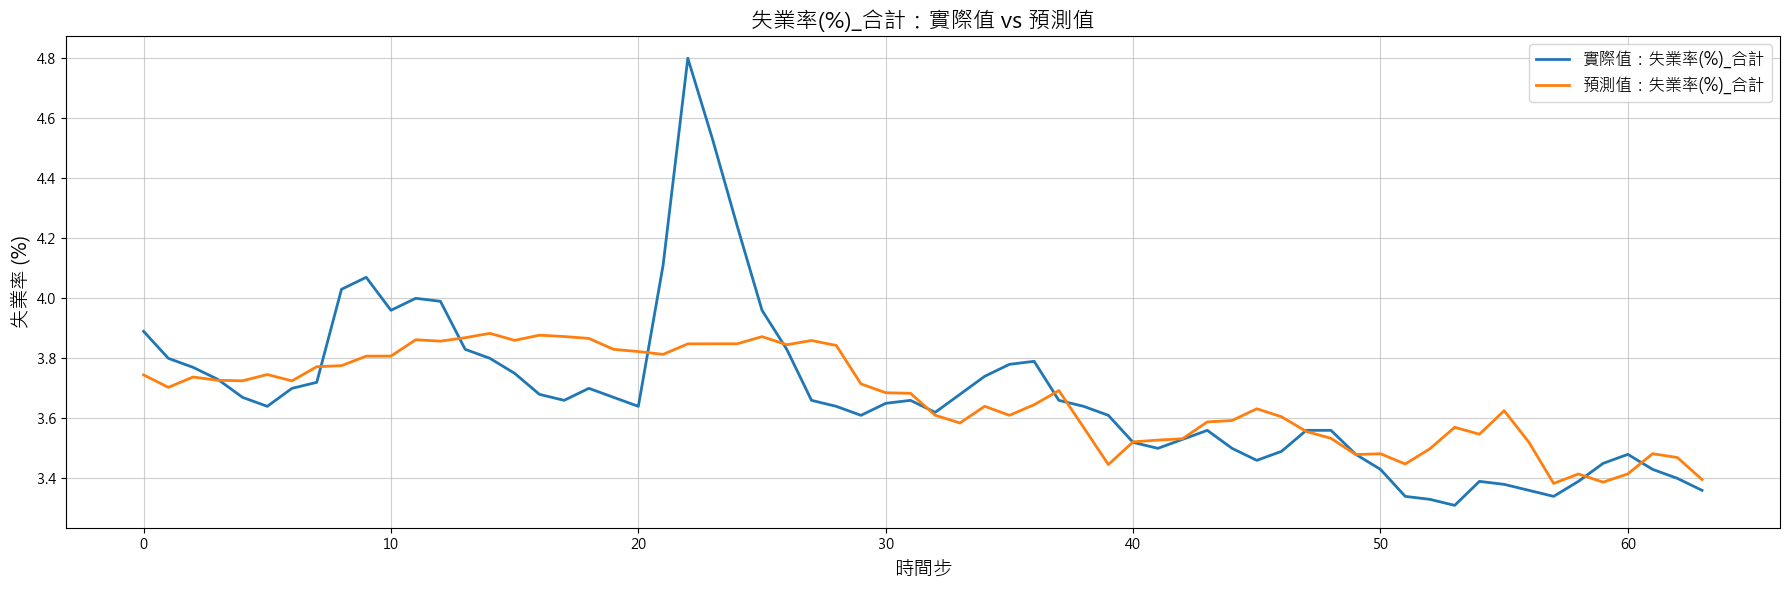

    實際值       預測值       MAE
0  3.89  3.744748  0.145252
1  3.80  3.703311  0.096689
2  3.77  3.737745  0.032255
3  3.73  3.726779  0.003221
4  3.67  3.725157  0.055157


In [ ]:
'''# ------------------- 套件匯入 -------------------
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.callbacks import EarlyStopping
import tensorflow as tf
import tqdm

# ------------------- 設定亂數種子 -------------------
os.environ['PYTHONHASHSEED'] = '42'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# ------------------- 讀取與前處理資料 -------------------
df = pd.read_excel(r"C:\Users\Jacky\碩一 統計資訊\失業率資料_2.xlsx")
df = df.iloc[:, 1:]

X = df.drop(columns=['失業率(%)_合計'])
y = df['失業率(%)_合計']

# 隨機森林特徵重要性
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20).index.tolist()
print("隨機森林選出的變數：", top_features)

df = df[top_features + ['失業率(%)_合計']]

# ------------------- 資料切分與標準化 -------------------
train_size = 200
train = df.iloc[:train_size]
test = df.iloc[train_size:]

scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns=df.columns)
test = pd.DataFrame(scaler.transform(test), columns=df.columns)

# ------------------- 建構訓練資料 -------------------
n = 12
X_train, y_train = [], []
feature_names = list(train.drop(columns=['失業率(%)_合計']).columns)
norm_data_x_train = train[feature_names]

for i in tqdm.tqdm(range(0, len(train) - n)):
    X_train.append(norm_data_x_train.iloc[i:i+n].values)
    y_train.append(train['失業率(%)_合計'].iloc[i + n])

X_train = np.array(X_train)
y_train = np.array(y_train)

# ------------------- 建構測試資料 -------------------
X_test, y_test = [], []
feature_names = list(test.drop(columns=['失業率(%)_合計']).columns)
norm_data_x_test = test[feature_names]

for i in tqdm.tqdm(range(0, len(test) - n)):
    X_test.append(norm_data_x_test.iloc[i:i+n].values)
    y_test.append(test['失業率(%)_合計'].iloc[i + n - 1])

X_test = np.array(X_test)
y_test = np.array(y_test)

# ------------------- 建構 GRU 模型 + EarlyStopping -------------------
n_steps = 12
n_features = X_train.shape[2]

model = Sequential()
model.add(GRU(25, activation='relu', return_sequences=False, input_shape=(n_steps, n_features))) # 25  #dropout = 0.3
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mape'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ------------------- 繪製 Loss 圖 -------------------
plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 6))
plt.plot(history.history["loss"], label="訓練Loss", linewidth=2)
plt.plot(history.history["val_loss"], label="測試Loss", linewidth=2)
plt.title("訓練與測試Loss對比", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss (MSE)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

# ------------------- 預測與反標準化 -------------------
predictions = model.predict(X_test)

y_pred_scaled = predictions.reshape(-1, 1)
y_test_scaled = y_test.reshape(-1, 1)

n_features_full = train.shape[1]
dummy_pred = np.zeros((len(y_pred_scaled), n_features_full))
dummy_test = np.zeros((len(y_test_scaled), n_features_full))

dummy_pred[:, -1] = y_pred_scaled[:, 0]
dummy_test[:, -1] = y_test_scaled[:, 0]

y_pred_original = scaler.inverse_transform(dummy_pred)[:, -1]
y_test_original = scaler.inverse_transform(dummy_test)[:, -1]

# ------------------- 評估指標 -------------------
r2 = r2_score(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")

# ------------------- 預測結果對比圖 -------------------
plt.figure(figsize=(18, 6))
plt.plot(y_test_original, label='實際值：失業率(%)_合計', linewidth=2)
plt.plot(y_pred_original, label='預測值：失業率(%)_合計', linewidth=2)
plt.title("失業率(%)_合計：實際值 vs 預測值", fontsize=16)
plt.xlabel("時間步", fontsize=14)
plt.ylabel("失業率 (%)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

# ------------------- 建立結果表 -------------------
result_df = pd.DataFrame({
    '實際值': y_test_original,
    '預測值': y_pred_original
})
result_df['MAE'] = abs(result_df['實際值'] - result_df['預測值'])

print(result_df.head())'''


## 加入時間資訊挑選特征

In [ ]:
"""# ------------------- 讀取資料 + 擷取時間 -------------------
df = pd.read_excel(r"C:\Users\Jacky\碩一 統計資訊\失業率資料_2.xlsx")

# 時間處理（將「統計期」轉成數值時間特徵）
df['year'] = df['統計期'].str.extract(r'(\d+)年').astype(int)
df['month'] = df['統計期'].str.extract(r'(\d+)月').astype(int)

# 若想轉西元年：df['year'] = df['year'] + 1911

# 加入 sin/cos 編碼（週期性時間）
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# 移除原始時間欄與缺失值欄（如果有）
df = df.drop(columns=['統計期'])

# ------------------- 特徵與目標 -------------------
X = df.drop(columns=['失業率(%)_合計'])
y = df['失業率(%)_合計']

# ------------------- RandomForest 特徵選擇 -------------------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20).index.tolist()

print("隨機森林選出的前 20 個變數：")
print(top_features)

# ------------------- 篩選變數 -------------------
df = df[top_features + ['失業率(%)_合計']]"""


隨機森林選出的前 20 個變數：
['各國證券市場股價指數比較_日本日經225', '各國證券市場股價指數比較_美國道瓊工業指數', '上市股票平均每股市值及獲利概況_平均每股盈餘(新臺幣元)', '公開發行公司股票發行概況_其他公開發行公司-家數-興櫃股票(家)', '票券市場統計-按交易金額工具別(新臺幣百萬元)_可轉讓定期存單_賣出', '外匯統計-我國與主要貿易對手通貨對美元之匯率_英鎊 (USD/GBP)', '上市股票平均每股市值及獲利概況_本益比(倍)', '外匯統計-外匯交易量、淨部位及外匯存底-月_銀行對顧客市場-小計(美金百萬元)', '受僱員工人數_工業部門(人)', '公開發行公司股票發行概況_其他公開發行公司-資本額-興櫃股票(十億元)', '全體銀行存款餘額統計-科目別_定期儲蓄存款(新台幣百萬元)', '全體銀行存款餘額統計-科目別_機關存款(新台幣百萬元)', '全體銀行存款餘額統計-科目別_政府存款-計(新台幣百萬元)', '公開發行公司股票發行概況_上櫃公司-上櫃面值(十億元)', '受僱員工人數_服務業部門(人)', '各國證券市場股價指數比較_倫敦金融時報', '全體銀行存款餘額統計-科目別_外匯定期存款(新台幣百萬元)', '外匯統計-即期匯率_歐元(新台幣元)_買入', '外匯統計-我國與主要貿易對手通貨對美元之匯率_日圓 (JPY/USD)', '外匯統計-外匯交易量、淨部位及外匯存底-月_銀行間市場-遠期(美金百萬元)']


# 從這開始是正式的code

# GRU 預測失業率

隨機森林選出的變數： ['各國證券市場股價指數比較_日本日經225', '各國證券市場股價指數比較_美國道瓊工業指數', '公開發行公司股票發行概況_其他公開發行公司-家數-興櫃股票(家)', '上市股票平均每股市值及獲利概況_平均每股盈餘(新臺幣元)', '票券市場統計-按交易金額工具別(新臺幣百萬元)_可轉讓定期存單_賣出', '上市股票平均每股市值及獲利概況_本益比(倍)', '外匯統計-我國與主要貿易對手通貨對美元之匯率_英鎊 (USD/GBP)', '公開發行公司股票發行概況_其他公開發行公司-資本額-興櫃股票(十億元)', '外匯統計-外匯交易量、淨部位及外匯存底-月_銀行對顧客市場-小計(美金百萬元)', '受僱員工人數_工業部門(人)', '全體銀行存款餘額統計-科目別_定期儲蓄存款(新台幣百萬元)', '全體銀行存款餘額統計-科目別_機關存款(新台幣百萬元)', '公開發行公司股票發行概況_上櫃公司-上櫃面值(十億元)', '受僱員工人數_服務業部門(人)', '各國證券市場股價指數比較_倫敦金融時報', '全體銀行存款餘額統計-科目別_政府存款-計(新台幣百萬元)', '全體銀行存款餘額統計-科目別_外匯定期存款(新台幣百萬元)', '外匯統計-即期匯率_歐元(新台幣元)_買入', '外匯統計-即期匯率_歐元(新台幣元)_賣出', '外匯統計-我國與主要貿易對手通貨對美元之匯率_日圓 (JPY/USD)']


100%|██████████| 51/51 [00:00<00:00, 50809.86it/s]

Epoch 1/100



c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1399 - mape: 409077.8438 - mse: 0.1399 - val_loss: 0.1563 - val_mape: 10193418.0000 - val_mse: 0.1563
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0731 - mape: 90649.6094 - mse: 0.0731 - val_loss: 0.1029 - val_mape: 8616688.0000 - val_mse: 0.1029
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0464 - mape: 419592.6562 - mse: 0.0464 - val_loss: 0.0476 - val_mape: 6225390.5000 - val_mse: 0.0476
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0533 - mape: 822138.8125 - mse: 0.0533 - val_loss: 0.0177 - val_mape: 3823808.7500 - val_mse: 0.0177
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0491 - mape: 1522665.2500 - mse: 0.0491 - val_loss: 0.0162 - val_mape: 3552595.7500 - val_mse: 0.0162
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0416 - mape: 1010698.8750 - mse: 0.0416 - val_loss: 0.0175 - val_mape: 3383179.5000 - val_mse: 0.0175
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━

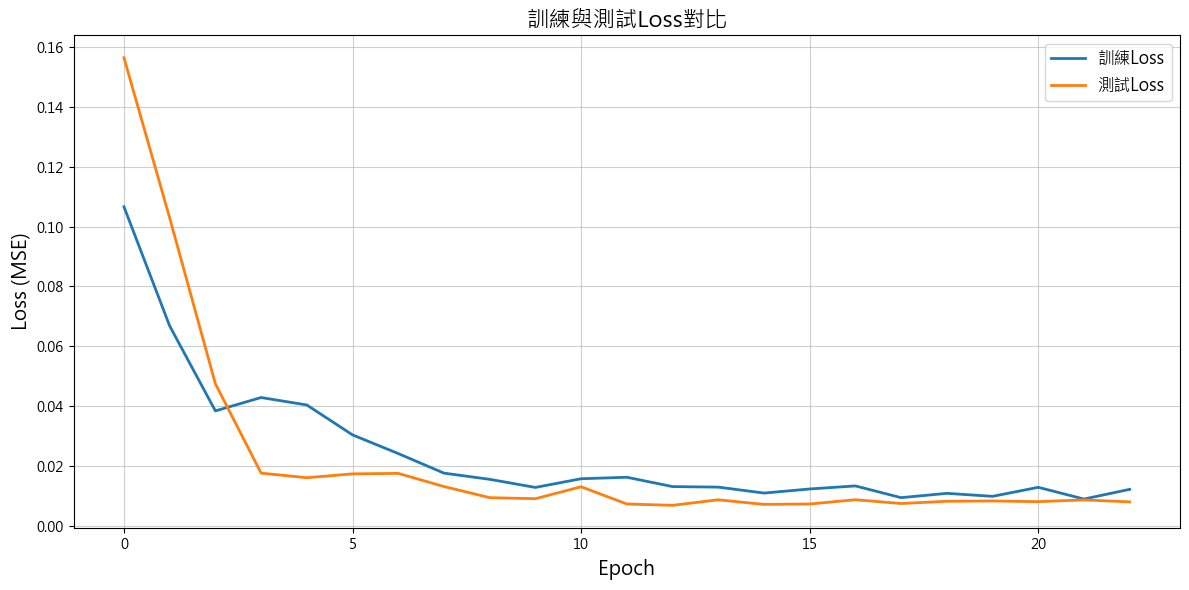

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
MAE: 0.1374
RMSE: 0.2099
MAPE: 3.58%
R²: 0.4522

 Zero-Rule Model（最簡 baseline）:
MAE : 3.3878
RMSE: 3.3997
MAPE: 93.11%
R²  : -142.7167


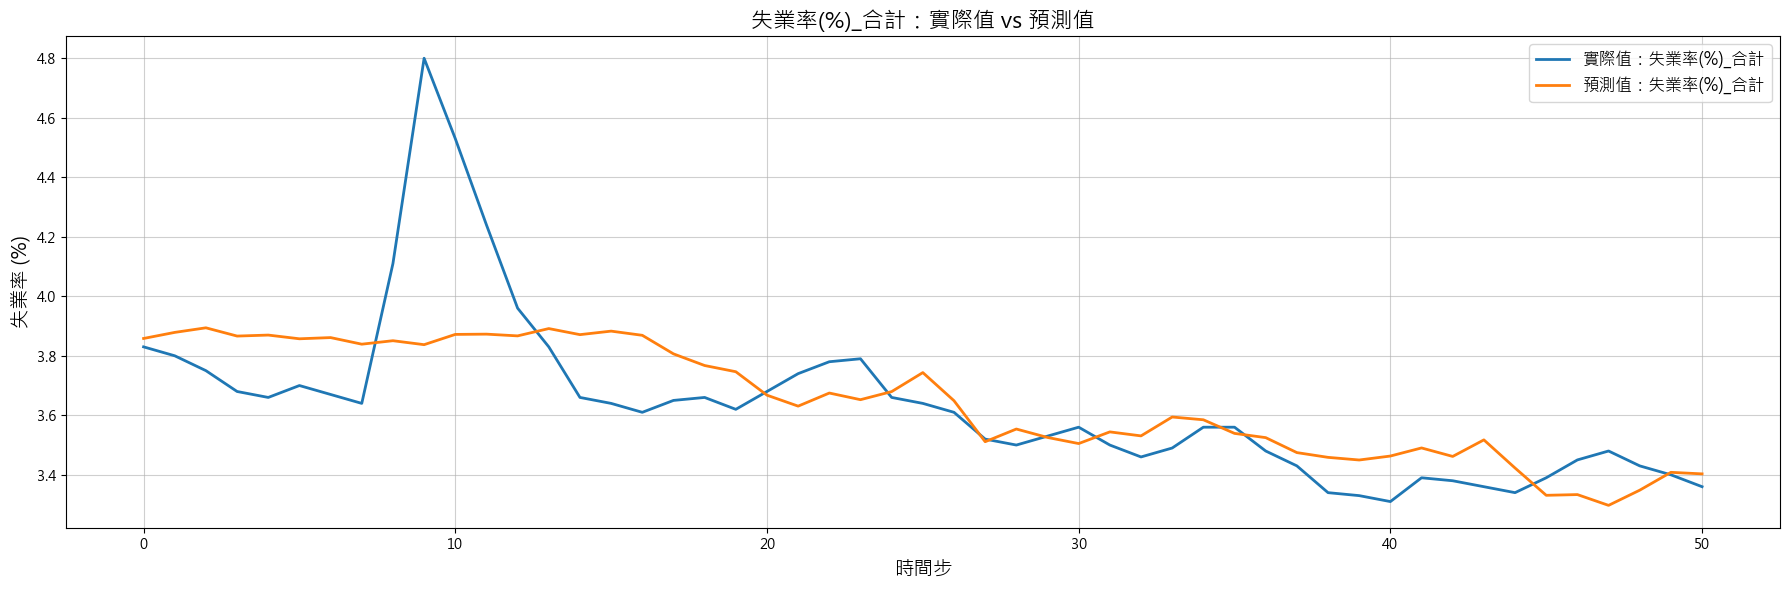

    實際值       預測值       MAE
0  3.83  3.858207  0.028207
1  3.80  3.878616  0.078616
2  3.75  3.894012  0.144012
3  3.68  3.866267  0.186267
4  3.66  3.869608  0.209608


In [11]:
# ------------------- 套件匯入 -------------------
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.callbacks import EarlyStopping
import tensorflow as tf
import tqdm

# ------------------- 設定亂數種子 -------------------
os.environ['PYTHONHASHSEED'] = '42'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# ------------------- 讀取與前處理資料 -------------------
df = pd.read_excel(r"C:\Users\Jacky\碩一 統計資訊\失業率資料_2.xlsx")
df = df.iloc[:, 1:]

X = df.drop(columns=['失業率(%)_合計'])
y = df['失業率(%)_合計']

# 隨機森林特徵重要性
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20).index.tolist()
print("隨機森林選出的變數：", top_features)

df = df[top_features + ['失業率(%)_合計']]

# ------------------- 資料切分與標準化 -------------------
train_size = 200
train = df.iloc[:train_size]
test = df.iloc[train_size:]

scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns=df.columns)
test = pd.DataFrame(scaler.transform(test), columns=df.columns)

# ------------------- 建構訓練資料 -------------------
n = 24
X_train, y_train = [], []
feature_names = list(train.drop(columns=['失業率(%)_合計']).columns)
norm_data_x_train = train[feature_names]

for i in tqdm.tqdm(range(0, len(train) - n)):
    X_train.append(norm_data_x_train.iloc[i:i+n].values)
    y_train.append(train['失業率(%)_合計'].iloc[i + n])

X_train = np.array(X_train)
y_train = np.array(y_train)

# ------------------- 建構測試資料 -------------------
X_test, y_test = [], []
feature_names = list(test.drop(columns=['失業率(%)_合計']).columns)
norm_data_x_test = test[feature_names]

for i in tqdm.tqdm(range(0, len(test) - n -1)):
    X_test.append(norm_data_x_test.iloc[i:i+n].values)
    y_test.append(test['失業率(%)_合計'].iloc[i + n])

X_test = np.array(X_test)
y_test = np.array(y_test)

# ------------------- 建構 GRU 模型 + EarlyStopping -------------------
n_steps = 24
n_features = X_train.shape[2]

model = Sequential()
model.add(GRU(25, activation='relu', return_sequences=False, input_shape=(n_steps, n_features))) # 25  #dropout = 0.3
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mape'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    batch_size = 8,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ------------------- 繪製 Loss 圖 -------------------
plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 6))
plt.plot(history.history["loss"], label="訓練Loss", linewidth=2)
plt.plot(history.history["val_loss"], label="測試Loss", linewidth=2)
plt.title("訓練與測試Loss對比", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss (MSE)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

# ------------------- 預測與反標準化 -------------------
predictions = model.predict(X_test)

y_pred_scaled = predictions.reshape(-1, 1)
y_test_scaled = y_test.reshape(-1, 1)

n_features_full = train.shape[1]
dummy_pred = np.zeros((len(y_pred_scaled), n_features_full))
dummy_test = np.zeros((len(y_test_scaled), n_features_full))

dummy_pred[:, -1] = y_pred_scaled[:, 0]
dummy_test[:, -1] = y_test_scaled[:, 0]

y_pred_original = scaler.inverse_transform(dummy_pred)[:, -1]
y_test_original = scaler.inverse_transform(dummy_test)[:, -1]

# ------------------- 評估指標 -------------------
r2 = r2_score(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")

# ------------------- Zero-Rule Model（Baseline） -------------------
zero_rule_value = np.mean(y_train)  # 用訓練集 y 的平均值
zero_rule_pred = np.full_like(y_test_original, fill_value=zero_rule_value)

zr_mae = mean_absolute_error(y_test_original, zero_rule_pred)
zr_rmse = np.sqrt(mean_squared_error(y_test_original, zero_rule_pred))
zr_mape = np.mean(np.abs((y_test_original - zero_rule_pred) / y_test_original)) * 100
zr_r2 = r2_score(y_test_original, zero_rule_pred)

print("\n Zero-Rule Model（最簡 baseline）:")
print(f"MAE : {zr_mae:.4f}")
print(f"RMSE: {zr_rmse:.4f}")
print(f"MAPE: {zr_mape:.2f}%")
print(f"R²  : {zr_r2:.4f}")

# ------------------- 預測結果對比圖 -------------------
plt.figure(figsize=(18, 6))
plt.plot(y_test_original, label='實際值：失業率(%)_合計', linewidth=2)
plt.plot(y_pred_original, label='預測值：失業率(%)_合計', linewidth=2)
plt.title("失業率(%)_合計：實際值 vs 預測值", fontsize=16)
plt.xlabel("時間步", fontsize=14)
plt.ylabel("失業率 (%)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

# ------------------- 建立結果表 -------------------
result_df = pd.DataFrame({
    '實際值': y_test_original,
    '預測值': y_pred_original
})
result_df['MAE'] = abs(result_df['實際值'] - result_df['預測值'])

print(result_df.head())

# 在 GRU 模型那段結尾加上：
gru_pred_original = y_pred_original.copy()

## lstm 預測失業率

隨機森林選出的變數： ['各國證券市場股價指數比較_日本日經225', '各國證券市場股價指數比較_美國道瓊工業指數', '公開發行公司股票發行概況_其他公開發行公司-家數-興櫃股票(家)', '上市股票平均每股市值及獲利概況_平均每股盈餘(新臺幣元)', '票券市場統計-按交易金額工具別(新臺幣百萬元)_可轉讓定期存單_賣出', '上市股票平均每股市值及獲利概況_本益比(倍)', '外匯統計-我國與主要貿易對手通貨對美元之匯率_英鎊 (USD/GBP)', '公開發行公司股票發行概況_其他公開發行公司-資本額-興櫃股票(十億元)', '外匯統計-外匯交易量、淨部位及外匯存底-月_銀行對顧客市場-小計(美金百萬元)', '受僱員工人數_工業部門(人)', '全體銀行存款餘額統計-科目別_定期儲蓄存款(新台幣百萬元)', '全體銀行存款餘額統計-科目別_機關存款(新台幣百萬元)', '公開發行公司股票發行概況_上櫃公司-上櫃面值(十億元)', '受僱員工人數_服務業部門(人)', '各國證券市場股價指數比較_倫敦金融時報', '全體銀行存款餘額統計-科目別_政府存款-計(新台幣百萬元)', '全體銀行存款餘額統計-科目別_外匯定期存款(新台幣百萬元)', '外匯統計-即期匯率_歐元(新台幣元)_買入', '外匯統計-即期匯率_歐元(新台幣元)_賣出', '外匯統計-我國與主要貿易對手通貨對美元之匯率_日圓 (JPY/USD)']


100%|██████████| 51/51 [00:00<00:00, 50846.09it/s]

Epoch 1/100



c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2565 - mape: 209951.5000 - mse: 0.2565 - val_loss: 0.1146 - val_mape: 7753130.0000 - val_mse: 0.1146
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0473 - mape: 663418.8750 - mse: 0.0473 - val_loss: 0.0082 - val_mape: 1409770.2500 - val_mse: 0.0082
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0340 - mape: 70956.3594 - mse: 0.0340 - val_loss: 0.0099 - val_mape: 348529.5312 - val_mse: 0.0099
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0318 - mape: 302613.0625 - mse: 0.0318 - val_loss: 0.0074 - val_mape: 326981.2812 - val_mse: 0.0074
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0235 - mape: 307231.5938 - mse: 0.0235 - val_loss: 0.0088 - val_mape: 231078.0625 - val_mse: 0.0088
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0295 - mape: 420965.1250 - mse: 0.0295 - val_loss: 0.0072 - val_mape: 199381.3906 - val_mse: 0.0072
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms

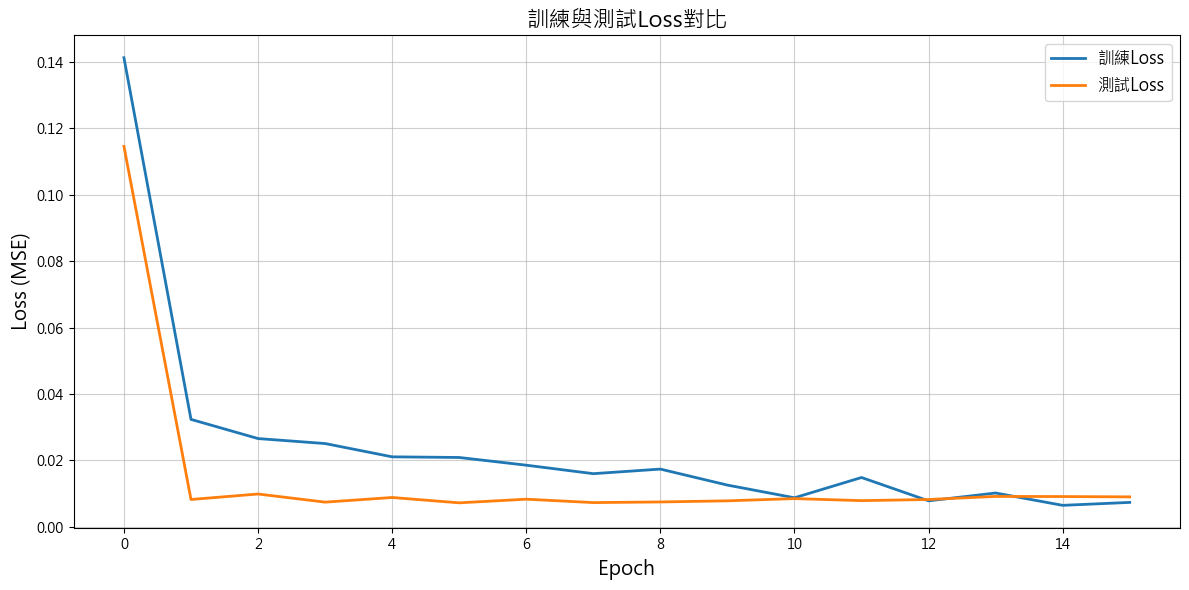

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
MAE: 0.1201
RMSE: 0.2135
MAPE: 3.05%
R²: 0.4333


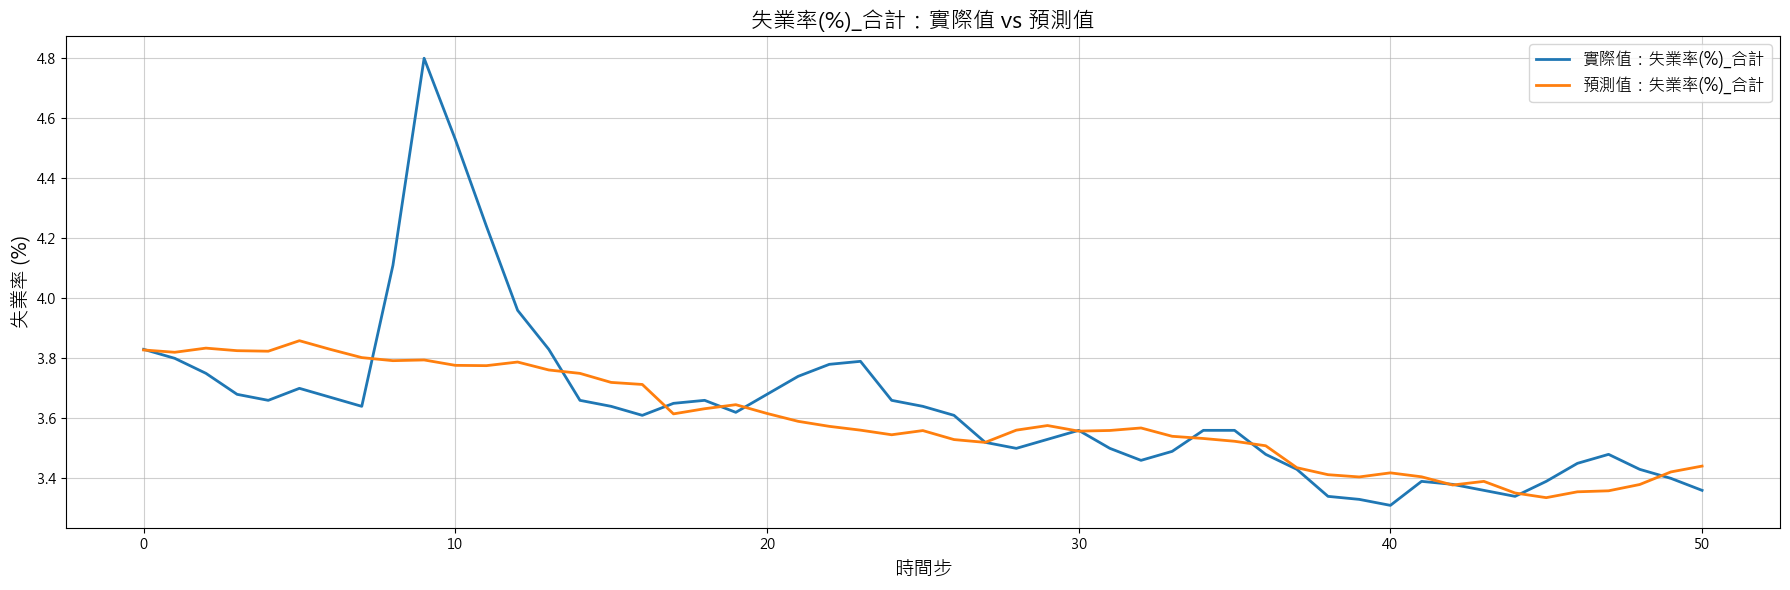

    實際值       預測值       MAE
0  3.83  3.827859  0.002141
1  3.80  3.820166  0.020166
2  3.75  3.833996  0.083996
3  3.68  3.825489  0.145489
4  3.66  3.823725  0.163725


In [12]:
# ------------------- 套件匯入 -------------------
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout  # 使用 LSTM
from keras.callbacks import EarlyStopping
import tensorflow as tf
import tqdm

# ------------------- 設定亂數種子 -------------------
os.environ['PYTHONHASHSEED'] = '42'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# ------------------- 讀取與前處理資料 -------------------
df = pd.read_excel(r"C:\Users\Jacky\碩一 統計資訊\失業率資料_2.xlsx")
df = df.iloc[:, 1:]

X = df.drop(columns=['失業率(%)_合計'])
y = df['失業率(%)_合計']

# 隨機森林特徵重要性
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20).index.tolist()
print("隨機森林選出的變數：", top_features)

df = df[top_features + ['失業率(%)_合計']]

# ------------------- 資料切分與標準化 -------------------
train_size = 200
train = df.iloc[:train_size]
test = df.iloc[train_size:]

scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns=df.columns)
test = pd.DataFrame(scaler.transform(test), columns=df.columns)

# ------------------- 建構訓練資料 -------------------
n = 24
X_train, y_train = [], []
feature_names = list(train.drop(columns=['失業率(%)_合計']).columns)
norm_data_x_train = train[feature_names]

for i in tqdm.tqdm(range(0, len(train) - n)):
    X_train.append(norm_data_x_train.iloc[i:i+n].values)
    y_train.append(train['失業率(%)_合計'].iloc[i + n])

X_train = np.array(X_train)
y_train = np.array(y_train)

# ------------------- 建構測試資料 -------------------
X_test, y_test = [], []
feature_names = list(test.drop(columns=['失業率(%)_合計']).columns)
norm_data_x_test = test[feature_names]

for i in tqdm.tqdm(range(0, len(test) - n - 1)):
    X_test.append(norm_data_x_test.iloc[i:i+n].values)
    y_test.append(test['失業率(%)_合計'].iloc[i + n])

X_test = np.array(X_test)
y_test = np.array(y_test)

# ------------------- 建構 LSTM 模型 + EarlyStopping -------------------
n_steps = 24
n_features = X_train.shape[2]

model = Sequential()
model.add(LSTM(20, activation='relu', return_sequences=False, input_shape=(n_steps, n_features)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mape'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ------------------- 繪製 Loss 圖 -------------------
plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 6))
plt.plot(history.history["loss"], label="訓練Loss", linewidth=2)
plt.plot(history.history["val_loss"], label="測試Loss", linewidth=2)
plt.title("訓練與測試Loss對比", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss (MSE)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

# ------------------- 預測與反標準化 -------------------
predictions = model.predict(X_test)

y_pred_scaled = predictions.reshape(-1, 1)
y_test_scaled = y_test.reshape(-1, 1)

n_features_full = train.shape[1]
dummy_pred = np.zeros((len(y_pred_scaled), n_features_full))
dummy_test = np.zeros((len(y_test_scaled), n_features_full))

dummy_pred[:, -1] = y_pred_scaled[:, 0]
dummy_test[:, -1] = y_test_scaled[:, 0]

y_pred_original = scaler.inverse_transform(dummy_pred)[:, -1]
y_test_original = scaler.inverse_transform(dummy_test)[:, -1]

# ------------------- 評估指標 -------------------
r2 = r2_score(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")

# ------------------- 預測結果對比圖 -------------------
plt.figure(figsize=(18, 6))
plt.plot(y_test_original, label='實際值：失業率(%)_合計', linewidth=2)
plt.plot(y_pred_original, label='預測值：失業率(%)_合計', linewidth=2)
plt.title("失業率(%)_合計：實際值 vs 預測值", fontsize=16)
plt.xlabel("時間步", fontsize=14)
plt.ylabel("失業率 (%)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

# ------------------- 建立結果表 -------------------
result_df = pd.DataFrame({
    '實際值': y_test_original,
    '預測值': y_pred_original
})
result_df['MAE'] = abs(result_df['實際值'] - result_df['預測值'])

print(result_df.head())

# 在 LSTM 模型那段結尾加上：
lstm_pred_original = y_pred_original.copy()

## RNN預測失業率

隨機森林選出的變數： ['各國證券市場股價指數比較_日本日經225', '各國證券市場股價指數比較_美國道瓊工業指數', '公開發行公司股票發行概況_其他公開發行公司-家數-興櫃股票(家)', '上市股票平均每股市值及獲利概況_平均每股盈餘(新臺幣元)', '票券市場統計-按交易金額工具別(新臺幣百萬元)_可轉讓定期存單_賣出', '上市股票平均每股市值及獲利概況_本益比(倍)', '外匯統計-我國與主要貿易對手通貨對美元之匯率_英鎊 (USD/GBP)', '公開發行公司股票發行概況_其他公開發行公司-資本額-興櫃股票(十億元)', '外匯統計-外匯交易量、淨部位及外匯存底-月_銀行對顧客市場-小計(美金百萬元)', '受僱員工人數_工業部門(人)', '全體銀行存款餘額統計-科目別_定期儲蓄存款(新台幣百萬元)', '全體銀行存款餘額統計-科目別_機關存款(新台幣百萬元)', '公開發行公司股票發行概況_上櫃公司-上櫃面值(十億元)', '受僱員工人數_服務業部門(人)', '各國證券市場股價指數比較_倫敦金融時報', '全體銀行存款餘額統計-科目別_政府存款-計(新台幣百萬元)', '全體銀行存款餘額統計-科目別_外匯定期存款(新台幣百萬元)', '外匯統計-即期匯率_歐元(新台幣元)_買入', '外匯統計-即期匯率_歐元(新台幣元)_賣出', '外匯統計-我國與主要貿易對手通貨對美元之匯率_日圓 (JPY/USD)']


100%|██████████| 51/51 [00:00<00:00, 33910.83it/s]

Epoch 1/100



c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5206 - mape: 1097982.5000 - mse: 0.5206 - val_loss: 0.1364 - val_mape: 3690719.0000 - val_mse: 0.1364
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1657 - mape: 1137898.3750 - mse: 0.1657 - val_loss: 0.1051 - val_mape: 4952711.0000 - val_mse: 0.1051
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1049 - mape: 2147016.7500 - mse: 0.1049 - val_loss: 0.1213 - val_mape: 7153871.0000 - val_mse: 0.1213
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0966 - mape: 1972254.6250 - mse: 0.0966 - val_loss: 0.1786 - val_mape: 9348867.0000 - val_mse: 0.1786
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0885 - mape: 1115793.8750 - mse: 0.0885 - val_loss: 0.1422 - val_mape: 8583869.0000 - val_mse: 0.1422
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0846 - mape: 94699.1484 - mse: 0.0846 - val_loss: 0.1362 - val_mape: 8849624.0000 - val_mse: 0.1362
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━

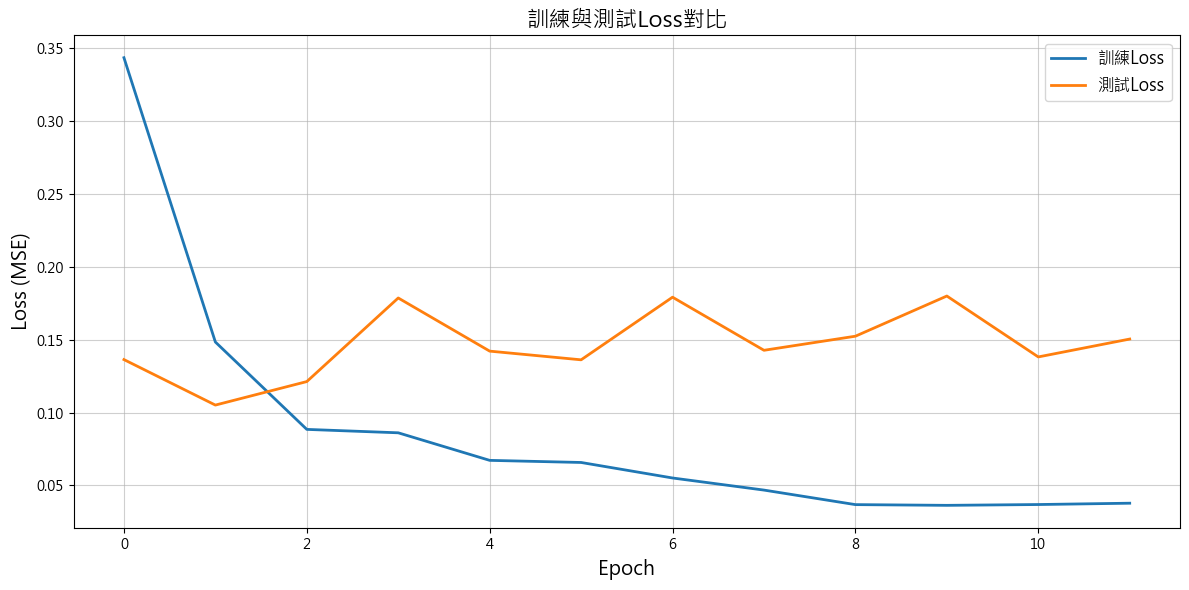

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
MAE: 0.6363
RMSE: 0.8138
MAPE: 17.19%
R²: -7.2348

 Zero-Rule Model（最簡 baseline）:
MAE : 3.3878
RMSE: 3.3997
MAPE: 93.11%
R²  : -142.7167


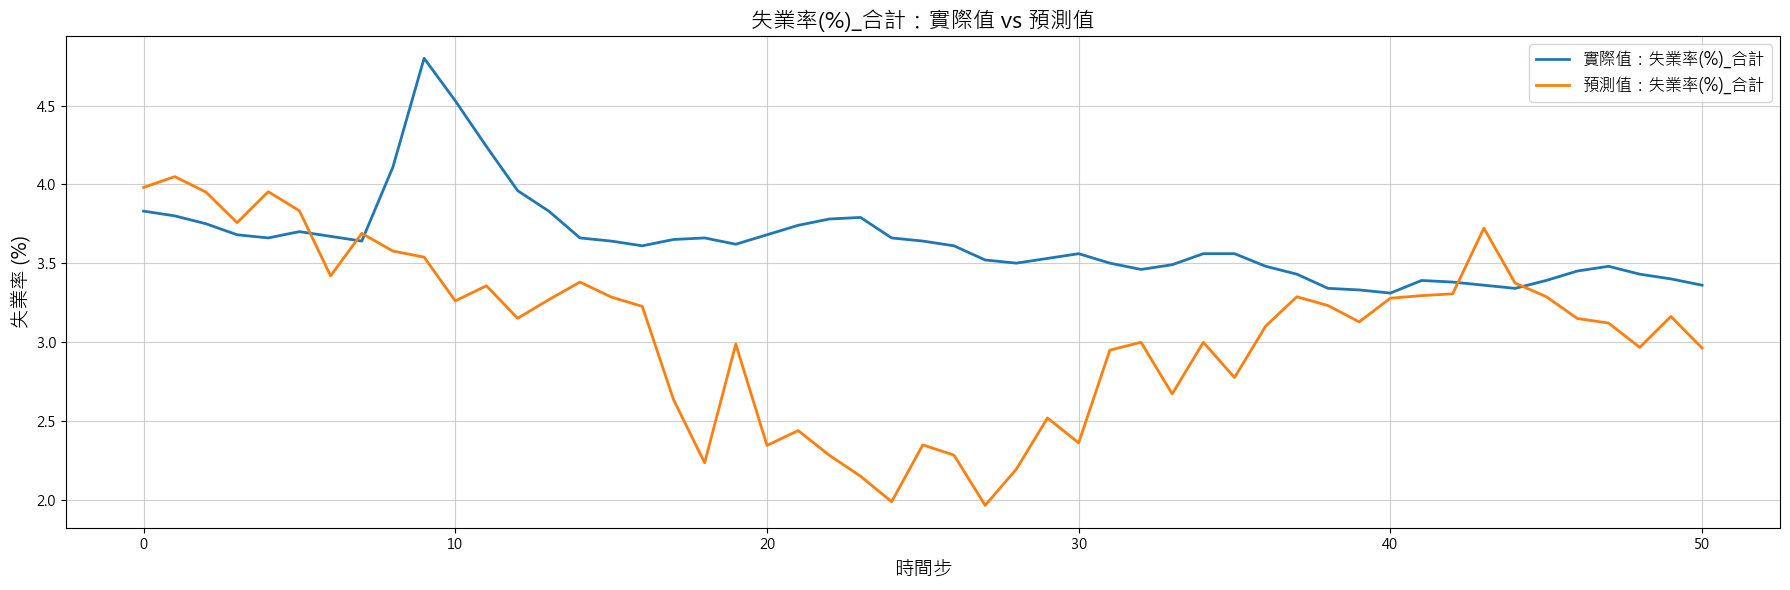

    實際值       預測值       MAE
0  3.83  3.980234  0.150234
1  3.80  4.048807  0.248807
2  3.75  3.950898  0.200898
3  3.68  3.756788  0.076788
4  3.66  3.953269  0.293269


In [13]:
# ------------------- 套件匯入 -------------------
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout  # ✅ 改這裡
from keras.callbacks import EarlyStopping
import tensorflow as tf
import tqdm

# ------------------- 設定亂數種子 -------------------
os.environ['PYTHONHASHSEED'] = '42'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# ------------------- 讀取與前處理資料 -------------------
df = pd.read_excel(r"C:\Users\Jacky\碩一 統計資訊\失業率資料_2.xlsx")
df = df.iloc[:, 1:]

X = df.drop(columns=['失業率(%)_合計'])
y = df['失業率(%)_合計']

# 隨機森林特徵重要性
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20).index.tolist()
print("隨機森林選出的變數：", top_features)

df = df[top_features + ['失業率(%)_合計']]

# ------------------- 資料切分與標準化 -------------------
train_size = 200
train = df.iloc[:train_size]
test = df.iloc[train_size:]

scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns=df.columns)
test = pd.DataFrame(scaler.transform(test), columns=df.columns)

# ------------------- 建構訓練資料 -------------------
n = 24
X_train, y_train = [], []
feature_names = list(train.drop(columns=['失業率(%)_合計']).columns)
norm_data_x_train = train[feature_names]

for i in tqdm.tqdm(range(0, len(train) - n)):
    X_train.append(norm_data_x_train.iloc[i:i+n].values)
    y_train.append(train['失業率(%)_合計'].iloc[i + n])

X_train = np.array(X_train)
y_train = np.array(y_train)

# ------------------- 建構測試資料 -------------------
X_test, y_test = [], []
feature_names = list(test.drop(columns=['失業率(%)_合計']).columns)
norm_data_x_test = test[feature_names]

for i in tqdm.tqdm(range(0, len(test) - n - 1)):
    X_test.append(norm_data_x_test.iloc[i:i+n].values)
    y_test.append(test['失業率(%)_合計'].iloc[i + n])

X_test = np.array(X_test)
y_test = np.array(y_test)

# ------------------- 建構 RNN 模型 + EarlyStopping -------------------
n_steps = 24
n_features = X_train.shape[2]

model = Sequential()
model.add(SimpleRNN(25, activation='relu', return_sequences=False, input_shape=(n_steps, n_features))) 
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mape'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ------------------- 繪製 Loss 圖 -------------------
plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 6))
plt.plot(history.history["loss"], label="訓練Loss", linewidth=2)
plt.plot(history.history["val_loss"], label="測試Loss", linewidth=2)
plt.title("訓練與測試Loss對比", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss (MSE)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

# ------------------- 預測與反標準化 -------------------
predictions = model.predict(X_test)

y_pred_scaled = predictions.reshape(-1, 1)
y_test_scaled = y_test.reshape(-1, 1)

n_features_full = train.shape[1]
dummy_pred = np.zeros((len(y_pred_scaled), n_features_full))
dummy_test = np.zeros((len(y_test_scaled), n_features_full))

dummy_pred[:, -1] = y_pred_scaled[:, 0]
dummy_test[:, -1] = y_test_scaled[:, 0]

y_pred_original = scaler.inverse_transform(dummy_pred)[:, -1]
y_test_original = scaler.inverse_transform(dummy_test)[:, -1]

# ------------------- 評估指標 -------------------
r2 = r2_score(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")

# ------------------- Zero-Rule Model（Baseline） -------------------
zero_rule_value = np.mean(y_train)
zero_rule_pred = np.full_like(y_test_original, fill_value=zero_rule_value)

zr_mae = mean_absolute_error(y_test_original, zero_rule_pred)
zr_rmse = np.sqrt(mean_squared_error(y_test_original, zero_rule_pred))
zr_mape = np.mean(np.abs((y_test_original - zero_rule_pred) / y_test_original)) * 100
zr_r2 = r2_score(y_test_original, zero_rule_pred)

print("\n Zero-Rule Model（最簡 baseline）:")
print(f"MAE : {zr_mae:.4f}")
print(f"RMSE: {zr_rmse:.4f}")
print(f"MAPE: {zr_mape:.2f}%")
print(f"R²  : {zr_r2:.4f}")

# ------------------- 預測結果對比圖 -------------------
plt.figure(figsize=(18, 6))
plt.plot(y_test_original, label='實際值：失業率(%)_合計', linewidth=2)
plt.plot(y_pred_original, label='預測值：失業率(%)_合計', linewidth=2)
plt.title("失業率(%)_合計：實際值 vs 預測值", fontsize=16)
plt.xlabel("時間步", fontsize=14)
plt.ylabel("失業率 (%)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

# ------------------- 建立結果表 -------------------
result_df = pd.DataFrame({
    '實際值': y_test_original,
    '預測值': y_pred_original
})
result_df['MAE'] = abs(result_df['實際值'] - result_df['預測值'])

print(result_df.head())

# 在 RNN 模型那段結尾加上：
rnn_pred_original = y_pred_original.copy()


## 繪製全部失業率走勢圖

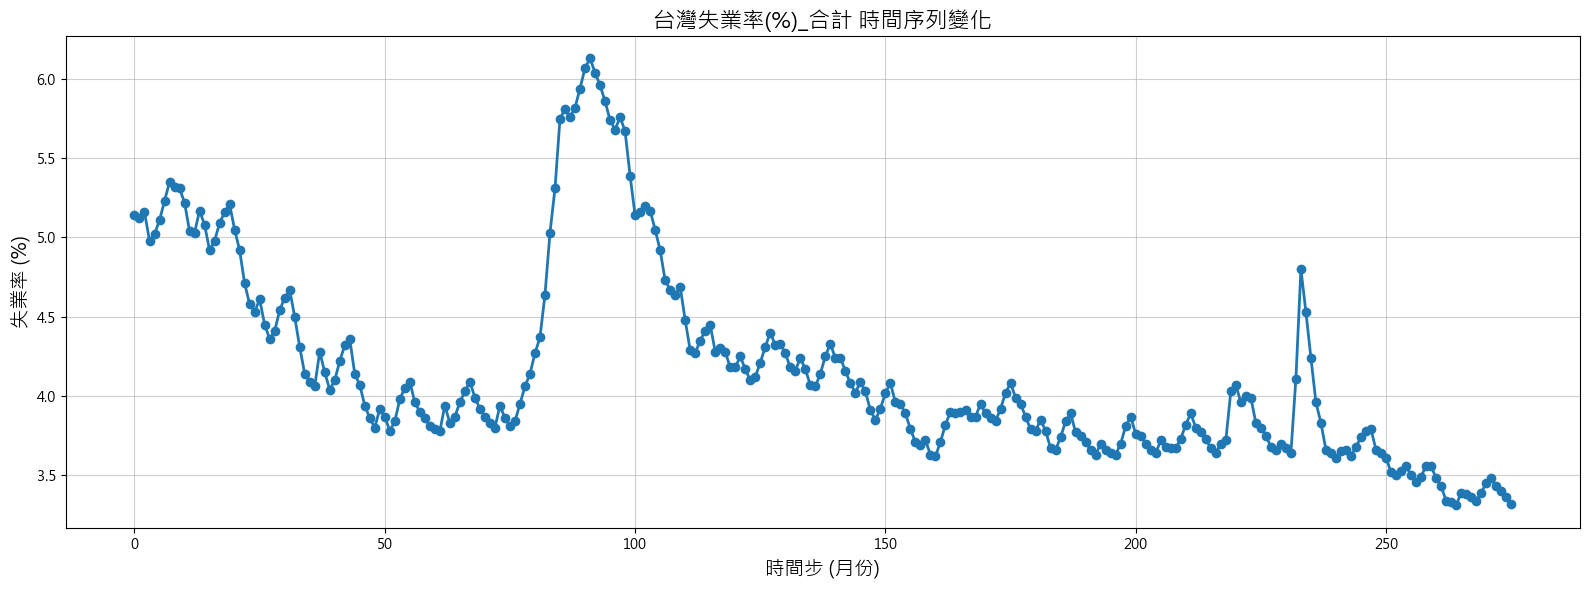

In [3]:
# ------------------- 原始失業率時間序列圖 -------------------
plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(16, 6))
plt.plot(df['失業率(%)_合計'].values, marker='o', linestyle='-', linewidth=2)
plt.title('台灣失業率(%)_合計 時間序列變化', fontsize=16)
plt.xlabel('時間步 (月份)', fontsize=14)
plt.ylabel('失業率 (%)', fontsize=14)
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()


## GRU 預測失業率漲跌幅

c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


c:\Users\Jacky\miniconda3\envs\stat-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
最佳超參數組合（依 R²）:
n_step = 6, units = 32, dropout = 0.3
MAE  : 0.0170
RMSE : 0.0293
SMAPE: 122.72%
R²   : 0.2631


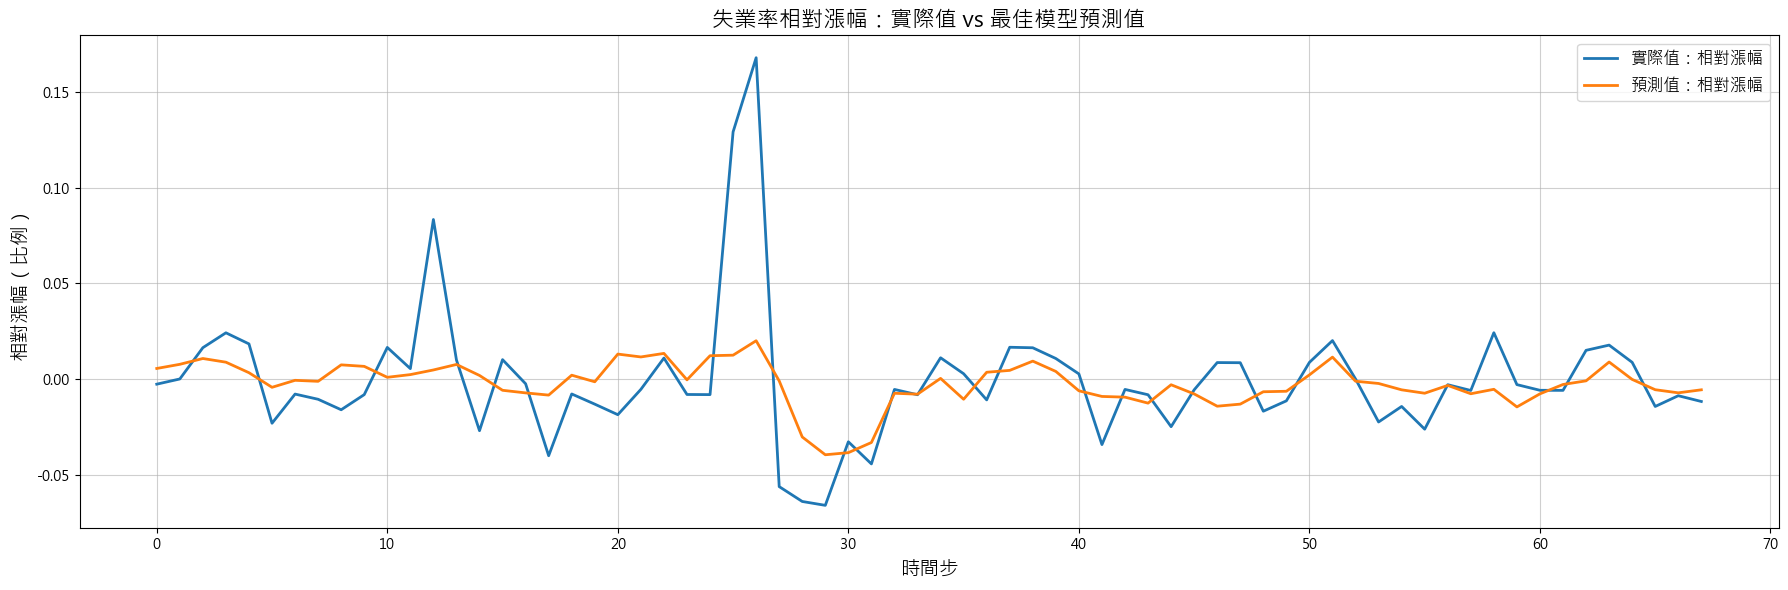

        實際值       預測值       MAE
0 -0.002717  0.005491  0.008209
1  0.000000  0.007656  0.007656
2  0.016349  0.010693  0.005656
3  0.024129  0.008773  0.015356
4  0.018325  0.003272  0.015053


In [12]:
# ------------------- 套件匯入 -------------------
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.callbacks import EarlyStopping
import tensorflow as tf
import tqdm

# ------------------- 設定亂數種子 -------------------
os.environ['PYTHONHASHSEED'] = '42'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# ------------------- 建立相對漲幅與變數篩選 -------------------
df = pd.read_excel(r"C:\Users\Jacky\碩一 統計資訊\失業率資料_2.xlsx")
df = df.iloc[:, 1:]
df['相對漲幅'] = df['失業率(%)_合計'].pct_change()
df = df.dropna().reset_index(drop=True)
df_filtered = df.drop(columns=['失業率(%)_合計'])

X = df_filtered.drop(columns=['相對漲幅'])
y = df_filtered['相對漲幅']
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20).index.tolist()
df = df_filtered[top_features + ['相對漲幅']]

# ------------------- 切分與標準化 -------------------
train_size = 200
train = df.iloc[:train_size]
test = df.iloc[train_size:]
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns=df.columns)
test = pd.DataFrame(scaler.transform(test), columns=df.columns)

# ------------------- Grid Search 超參數設定 -------------------
n_steps_list = [3, 6, 12, 24]
units_list = [30,31,32,33,34,35]
dropout_list = [0.1, 0.3, 0.5]

best_result = None
best_r2 = -np.inf

# ------------------- Grid Search 開始 -------------------
for n in n_steps_list:
    for units in units_list:
        for dropout in dropout_list:
            # 建構訓練資料
            X_train, y_train = [], []
            feature_names = list(train.drop(columns=['相對漲幅']).columns)
            for i in range(0, len(train) - n):
                X_train.append(train[feature_names].iloc[i:i+n].values)
                y_train.append(train['相對漲幅'].iloc[i + n])
            X_train = np.array(X_train)
            y_train = np.array(y_train)

            # 測試資料
            X_test, y_test = [], []
            for i in range(0, len(test) - n - 1):
                X_test.append(test[feature_names].iloc[i:i+n].values)
                y_test.append(test['相對漲幅'].iloc[i + n])
            X_test = np.array(X_test)
            y_test = np.array(y_test)

            if len(X_test) == 0:
                continue

            # 模型建構
            model = Sequential()
            model.add(GRU(units, activation='relu', return_sequences=False, input_shape=(n, X_train.shape[2])))
            model.add(Dropout(dropout))
            model.add(Dense(1))
            model.compile(optimizer='adam', loss='mse')

            early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
            model.fit(X_train, y_train, batch_size=8, epochs=100,
                      validation_data=(X_test, y_test), callbacks=[early_stop], verbose=0)

            # 反標準化
            predictions = model.predict(X_test).reshape(-1, 1)
            y_test = np.array(y_test).reshape(-1, 1)
            n_features_full = train.shape[1]
            dummy_pred = np.zeros((len(predictions), n_features_full))
            dummy_test = np.zeros((len(y_test), n_features_full))
            dummy_pred[:, -1] = predictions[:, 0]
            dummy_test[:, -1] = y_test[:, 0]
            y_pred_original = scaler.inverse_transform(dummy_pred)[:, -1]
            y_test_original = scaler.inverse_transform(dummy_test)[:, -1]

            # 評估指標
            r2 = r2_score(y_test_original, y_pred_original)
            if r2 > best_r2:
                best_r2 = r2
                best_result = {
                    'n': n,
                    'units': units,
                    'dropout': dropout,
                    'y_pred_original': y_pred_original,
                    'y_test_original': y_test_original,
                    'mae': mean_absolute_error(y_test_original, y_pred_original),
                    'rmse': np.sqrt(mean_squared_error(y_test_original, y_pred_original)),
                    'smape': np.mean(2 * np.abs(y_pred_original - y_test_original) /
                                     (np.abs(y_pred_original) + np.abs(y_test_original) + 1e-8)) * 100
                }

# ------------------- 輸出最佳模型結果 -------------------
print("最佳超參數組合（依 R²）:")
print(f"n_step = {best_result['n']}, units = {best_result['units']}, dropout = {best_result['dropout']}")
print(f"MAE  : {best_result['mae']:.4f}")
print(f"RMSE : {best_result['rmse']:.4f}")
print(f"SMAPE: {best_result['smape']:.2f}%")
print(f"R²   : {best_r2:.4f}")

# ------------------- 圖表與表格 -------------------
plt.figure(figsize=(18, 6))
plt.plot(best_result['y_test_original'], label='實際值：相對漲幅', linewidth=2)
plt.plot(best_result['y_pred_original'], label='預測值：相對漲幅', linewidth=2)
plt.title("失業率相對漲幅：實際值 vs 最佳模型預測值", fontsize=16)
plt.xlabel("時間步", fontsize=14)
plt.ylabel("相對漲幅（比例）", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

result_df = pd.DataFrame({
    '實際值': best_result['y_test_original'],
    '預測值': best_result['y_pred_original']
})
result_df['MAE'] = abs(result_df['實際值'] - result_df['預測值'])
print(result_df.head())


## GRU 預測漲跌

資料總長度: 276
選用特徵數量: 20
開始Grid Search...
參數組合總數: 48

進度: 1/48
測試參數: n_units=10, dropout_rate=0.1, n_steps=3
  Fold 1: Acc=0.8500, F1=0.8000
  Fold 2: Acc=1.0000, F1=1.0000
  Fold 3: Acc=0.8500, F1=0.8000
  平均結果: Acc=0.9000(±0.0707), F1=0.8667(±0.0943)
  ★ 新的最佳參數! F1分數: 0.8667

進度: 2/48
測試參數: n_units=10, dropout_rate=0.1, n_steps=6
  Fold 1: Acc=0.8000, F1=0.7143
  Fold 2: Acc=0.9500, F1=0.9333
  Fold 3: Acc=0.9500, F1=0.9231
  平均結果: Acc=0.9000(±0.0707), F1=0.8569(±0.1009)

進度: 3/48
測試參數: n_units=10, dropout_rate=0.1, n_steps=12
  Fold 1: Acc=0.7500, F1=0.4444
  Fold 2: Acc=0.9000, F1=0.8333
  Fold 3: Acc=0.9500, F1=0.9231
  平均結果: Acc=0.8667(±0.0850), F1=0.7336(±0.2077)

進度: 4/48
測試參數: n_units=10, dropout_rate=0.1, n_steps=24
  Fold 1: Acc=0.8000, F1=0.7143
  Fold 2: Acc=0.9500, F1=0.9091
  Fold 3: Acc=0.8500, F1=0.7692
  平均結果: Acc=0.8667(±0.0624), F1=0.7975(±0.0820)

進度: 5/48
測試參數: n_units=10, dropout_rate=0.3, n_steps=3
  Fold 1: Acc=0.7000, F1=0.6667
  Fold 2: Acc=1.0000, F1=1.0000
  F

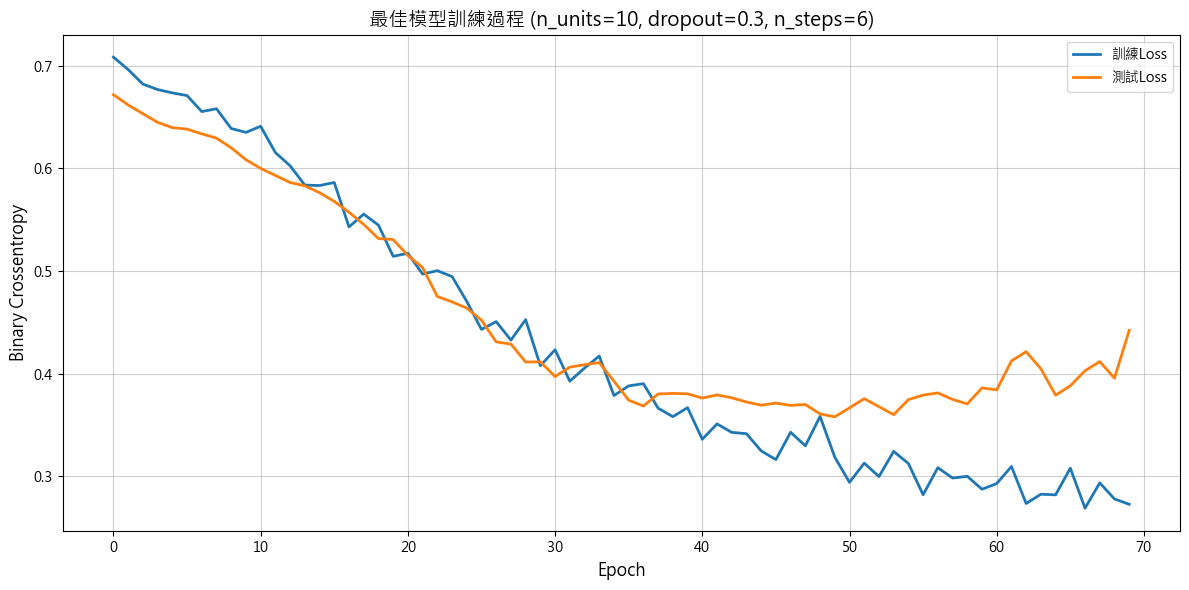


Grid Search結果已儲存至 'grid_search_results.csv'


<Figure size 600x600 with 0 Axes>

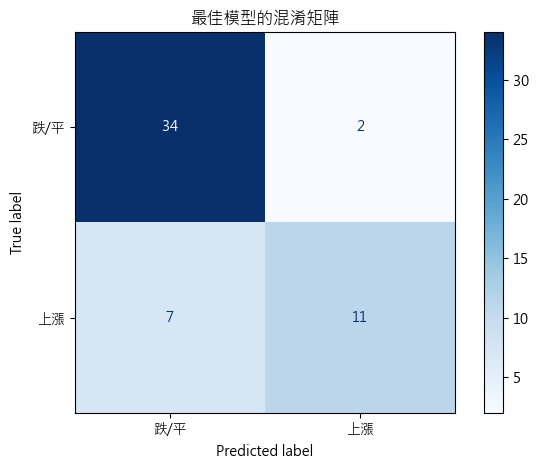


Grid Search完成!


In [16]:
import os
import random
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.callbacks import EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product
import warnings
warnings.filterwarnings('ignore')

# 設定隨機種子
os.environ['PYTHONHASHSEED'] = '42'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# 讀取資料
df = pd.read_excel(r"C:\Users\Jacky\碩一 統計資訊\失業率資料_2.xlsx")
df = df.iloc[:, 1:]

# 加入漲跌欄位：1 表上漲，0 表平或下跌
df['漲跌'] = (df['失業率(%)_合計'].diff() > 0).astype(int)
df = df.dropna().reset_index(drop=True)

# 特徵選擇（排除目標欄）
X = df.drop(columns=['失業率(%)_合計', '漲跌'])
y = df['漲跌']
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20).index.tolist()
df = df[top_features + ['漲跌']]

print(f"資料總長度: {len(df)}")
print(f"選用特徵數量: {len(top_features)}")

# 時間序列資料建構函數
def create_sequences(data, n_steps, feature_cols):
    """建構時間序列資料，保持時間順序"""
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[feature_cols].iloc[i:i+n_steps].values)
        y.append(data['漲跌'].iloc[i + n_steps])
    return np.array(X), np.array(y)

# 時間序列交叉驗證函數
def time_series_cv_split(data, n_splits=3, test_size=30):
    """
    時間序列交叉驗證分割，避免資料洩露
    每個fold使用歷史資料訓練，預測未來資料
    """
    total_len = len(data)
    fold_size = (total_len - test_size) // n_splits
    
    splits = []
    for i in range(n_splits):
        train_end = fold_size * (i + 1)
        val_start = train_end
        val_end = min(val_start + test_size, total_len)
        
        if val_end - val_start < 10:  # 確保驗證集有足夠資料
            break
            
        splits.append({
            'train_idx': (0, train_end),
            'val_idx': (val_start, val_end)
        })
    
    return splits

# 建構GRU模型函數
def build_gru_model(n_units, dropout_rate, n_features, n_steps):
    """建構GRU模型"""
    model = Sequential()
    model.add(GRU(n_units, 
                  activation='relu', 
                  return_sequences=False, 
                  input_shape=(n_steps, n_features)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

# Grid Search 參數
param_grid = {
    'n_units': [10, 20, 30, 50],          # GRU神經元數量
    'dropout_rate': [0.1, 0.3, 0.5], # Dropout比率
    'n_steps': [3, 6, 12, 24]               # 時間步長
}

# 資料標準化
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
feature_cols = [col for col in df_scaled.columns if col != '漲跌']

print("開始Grid Search...")
print(f"參數組合總數: {len(list(product(*param_grid.values())))}")

# 儲存結果
results = []
best_score = 0
best_params = None
best_model = None

# Grid Search主循環
param_combinations = list(product(*param_grid.values()))
total_combinations = len(param_combinations)

for idx, (n_units, dropout_rate, n_steps) in enumerate(param_combinations):
    print(f"\n進度: {idx+1}/{total_combinations}")
    print(f"測試參數: n_units={n_units}, dropout_rate={dropout_rate}, n_steps={n_steps}")
    
    try:
        # 檢查資料長度是否足夠
        if len(df_scaled) <= n_steps + 60:  # 至少需要訓練+驗證資料
            print("資料長度不足，跳過此參數組合")
            continue
        
        # 建構序列資料
        X, y = create_sequences(df_scaled, n_steps, feature_cols)
        
        if len(X) < 60:  # 確保有足夠資料進行交叉驗證
            print("序列資料不足，跳過此參數組合")
            continue
        
        # 時間序列交叉驗證
        cv_splits = time_series_cv_split(pd.DataFrame({'idx': range(len(X))}), 
                                       n_splits=3, test_size=20)
        
        if len(cv_splits) == 0:
            print("無法建立交叉驗證分割，跳過此參數組合")
            continue
        
        cv_scores = []
        
        for fold_idx, split in enumerate(cv_splits):
            train_start, train_end = split['train_idx']
            val_start, val_end = split['val_idx']
            
            # 分割資料
            X_train_fold = X[train_start:train_end]
            y_train_fold = y[train_start:train_end]
            X_val_fold = X[val_start:val_end]
            y_val_fold = y[val_start:val_end]
            
            if len(X_train_fold) < 10 or len(X_val_fold) < 5:
                continue
            
            # 重設隨機種子確保可重現性
            tf.random.set_seed(42)
            
            # 建構並訓練模型
            model = build_gru_model(n_units, dropout_rate, len(feature_cols), n_steps)
            
            early_stop = EarlyStopping(monitor='val_loss', patience=15, 
                                     restore_best_weights=True, verbose=0)
            
            # 訓練模型
            history = model.fit(
                X_train_fold, y_train_fold,
                batch_size=min(8, len(X_train_fold)//2),
                epochs=50,
                validation_data=(X_val_fold, y_val_fold),
                callbacks=[early_stop],
                verbose=0
            )
            
            # 預測並評估
            y_pred_proba = model.predict(X_val_fold, verbose=0).reshape(-1)
            y_pred_class = (y_pred_proba > 0.5).astype(int)
            
            fold_acc = accuracy_score(y_val_fold, y_pred_class)
            fold_f1 = f1_score(y_val_fold, y_pred_class, zero_division=0)
            
            cv_scores.append({
                'accuracy': fold_acc,
                'f1_score': fold_f1
            })
            
            print(f"  Fold {fold_idx+1}: Acc={fold_acc:.4f}, F1={fold_f1:.4f}")
        
        if len(cv_scores) == 0:
            print("所有fold都失敗，跳過此參數組合")
            continue
        
        # 計算平均分數
        avg_accuracy = np.mean([score['accuracy'] for score in cv_scores])
        avg_f1 = np.mean([score['f1_score'] for score in cv_scores])
        std_accuracy = np.std([score['accuracy'] for score in cv_scores])
        std_f1 = np.std([score['f1_score'] for score in cv_scores])
        
        # 使用F1分數作為主要評估指標
        combined_score = avg_f1
        
        result = {
            'n_units': n_units,
            'dropout_rate': dropout_rate,
            'n_steps': n_steps,
            'avg_accuracy': avg_accuracy,
            'std_accuracy': std_accuracy,
            'avg_f1': avg_f1,
            'std_f1': std_f1,
            'combined_score': combined_score
        }
        
        results.append(result)
        
        print(f"  平均結果: Acc={avg_accuracy:.4f}(±{std_accuracy:.4f}), F1={avg_f1:.4f}(±{std_f1:.4f})")
        
        # 更新最佳參數
        if combined_score > best_score:
            best_score = combined_score
            best_params = {
                'n_units': n_units,
                'dropout_rate': dropout_rate,
                'n_steps': n_steps
            }
            print(f"  ★ 新的最佳參數! F1分數: {best_score:.4f}")
    
    except Exception as e:
        print(f"  錯誤: {str(e)}")
        continue

# 顯示Grid Search結果
print("\n" + "="*80)
print("GRID SEARCH 結果")
print("="*80)

if len(results) > 0:
    # 轉換為DataFrame並排序
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('combined_score', ascending=False)
    
    print("\n前10名參數組合:")
    print(results_df.head(10).to_string(index=False, float_format='%.4f'))
    
    print(f"\n最佳參數組合:")
    print(f"GRU神經元數量: {best_params['n_units']}")
    print(f"Dropout比率: {best_params['dropout_rate']}")
    print(f"時間步長: {best_params['n_steps']}")
    print(f"最佳F1分數: {best_score:.4f}")
    
    # 使用最佳參數重新訓練最終模型
    print("\n使用最佳參數訓練最終模型...")
    
    # 重新建構序列資料
    X_final, y_final = create_sequences(df_scaled, best_params['n_steps'], feature_cols)
    
    # 分割最終訓練和測試集（保持時間順序）
    train_size = int(len(X_final) * 0.8)
    X_train_final = X_final[:train_size]
    y_train_final = y_final[:train_size]
    X_test_final = X_final[train_size:]
    y_test_final = y_final[train_size:]
    
    # 重設隨機種子
    tf.random.set_seed(42)
    
    # 建構最終模型
    final_model = build_gru_model(
        best_params['n_units'], 
        best_params['dropout_rate'], 
        len(feature_cols), 
        best_params['n_steps']
    )
    
    early_stop = EarlyStopping(monitor='val_loss', patience=20, 
                              restore_best_weights=True, verbose=0)
    
    # 訓練最終模型
    final_history = final_model.fit(
        X_train_final, y_train_final,
        batch_size=8,
        epochs=100,
        validation_data=(X_test_final, y_test_final),
        callbacks=[early_stop],
        verbose=1
    )
    
    # 最終預測與評估
    y_pred_proba_final = final_model.predict(X_test_final).reshape(-1)
    y_pred_class_final = (y_pred_proba_final > 0.5).astype(int)
    
    final_acc = accuracy_score(y_test_final, y_pred_class_final)
    final_f1 = f1_score(y_test_final, y_pred_class_final)
    
    print(f"\n最終模型測試結果:")
    print(f"Accuracy: {final_acc:.4f}")
    print(f"F1-score: {final_f1:.4f}")
    print("\n分類報告：")
    print(classification_report(y_test_final, y_pred_class_final, 
                              target_names=["跌/平", "上漲"]))
    
    # 繪製最終模型的Loss圖
    plt.figure(figsize=(12, 6))
    plt.plot(final_history.history["loss"], label="訓練Loss", linewidth=2)
    plt.plot(final_history.history["val_loss"], label="測試Loss", linewidth=2)
    plt.title(f"最佳模型訓練過程 (n_units={best_params['n_units']}, dropout={best_params['dropout_rate']}, n_steps={best_params['n_steps']})", fontsize=14)
    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Binary Crossentropy", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.6)
    plt.tight_layout()
    plt.show()
    
    # 儲存結果到CSV
    results_df.to_csv('grid_search_results.csv', index=False, encoding='utf-8-sig')
    print(f"\nGrid Search結果已儲存至 'grid_search_results.csv'")
    
else:
    print("沒有成功的參數組合，請檢查資料或調整參數範圍")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 混淆矩陣計算
cm = confusion_matrix(y_test_final, y_pred_class_final)

# 顯示混淆矩陣
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["跌/平", "上漲"])
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("最佳模型的混淆矩陣")
plt.grid(False)
plt.tight_layout()
plt.show()


print("\nGrid Search完成!")

## lstm 預測漲跌

In [ ]:
"""# 設定隨機種子
os.environ['PYTHONHASHSEED'] = '42'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# 讀取資料
df = pd.read_excel(r"C:\Users\Jacky\碩一 統計資訊\失業率資料_2.xlsx")
df = df.iloc[:, 1:]

# 加入漲跌欄位：1 表上漲，0 表平或下跌
df['漲跌'] = (df['失業率(%)_合計'].diff() > 0).astype(int)
df = df.dropna().reset_index(drop=True)

# 特徵選擇（排除目標欄）
X = df.drop(columns=['失業率(%)_合計', '漲跌'])
y = df['漲跌']
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20).index.tolist()

# 顯示選出的特徵
print(f"資料總長度: {len(df)}")
print(f"選用特徵數量: {len(top_features)}")
print("Random Forest 選出的 Top 20 特徵如下：")
for i, feat in enumerate(top_features, 1):
    print(f"{i:2d}. {feat}")"""


資料總長度: 276
選用特徵數量: 20
Random Forest 選出的 Top 20 特徵如下：
 1. 全國賦稅實徵淨額-按稅目別分_地價稅(新台幣百萬元)
 2. 消費者物價基本分類指數_二.衣著類_較上期增減率(%)
 3. 全國賦稅實徵淨額-按稅目別分_使用牌照稅(新台幣百萬元)
 4. 消費者物價基本分類指數_七.雜項類_較上期增減率(%)
 5. 全國賦稅實徵淨額-按稅目別分_關稅(新台幣百萬元)
 6. 全國賦稅實徵淨額-按稅目別分_營業稅(未指定用途)(新台幣百萬元)
 7. 全國賦稅實徵淨額-按稅目別分_營業稅(新台幣百萬元)
 8. 全體銀行存款餘額統計-科目別_公庫收入總存款(新台幣百萬元)
 9. 消費者物價基本分類指數_五.醫藥保健類_較上期增減率(%)
10. 全國賦稅實徵淨額-按稅目別分_綜合所得稅(新台幣百萬元)
11. 全國賦稅實徵淨額-按稅目別分_房屋稅(新台幣百萬元)
12. 外匯統計-外匯交易量、淨部位及外匯存底-月_全體外匯銀行外匯交易淨部位(期底數)(美金百萬元)
13. 全國賦稅實徵淨額-按稅目別分_菸酒稅(新台幣百萬元)
14. 票券市場統計-按交易金額工具別(新臺幣百萬元)_銀行承兌匯票_買入
15. 外匯統計-出進口外匯收支-月_出口外匯收入金額(美金百萬元)_結售新台幣
16. 外匯統計-我國與主要貿易對手通貨對美元之匯率_港幣 (HKD/USD)
17. 全國賦稅實徵淨額-按稅目別分_證券交易稅(新台幣百萬元)
18. 全國賦稅實徵淨額-按稅目別分_契稅(新台幣百萬元)
19. 全國賦稅實徵淨額-按稅目別分_期貨交易稅(新台幣百萬元)
20. 消費者物價基本分類指數_三.居住類_較上期增減率(%)


資料總長度: 276
選用特徵數量: 20
開始Grid Search...
參數組合總數: 48

進度: 1/48
測試參數: n_units=10, dropout_rate=0.1, n_steps=3
  Fold 1: Acc=0.8000, F1=0.7500
  Fold 2: Acc=0.9500, F1=0.9333
  Fold 3: Acc=0.9500, F1=0.9231
  平均結果: Acc=0.9000(±0.0707), F1=0.8688(±0.0841)
  ★ 新的最佳參數! F1分數: 0.8688

進度: 2/48
測試參數: n_units=10, dropout_rate=0.1, n_steps=6
  Fold 1: Acc=0.7500, F1=0.6667
  Fold 2: Acc=0.9500, F1=0.9231
  Fold 3: Acc=0.9500, F1=0.9231
  平均結果: Acc=0.8833(±0.0943), F1=0.8376(±0.1209)

進度: 3/48
測試參數: n_units=10, dropout_rate=0.1, n_steps=12
  Fold 1: Acc=0.8500, F1=0.5714
  Fold 2: Acc=0.8500, F1=0.7273
  Fold 3: Acc=0.9000, F1=0.8333
  平均結果: Acc=0.8667(±0.0236), F1=0.7107(±0.1076)

進度: 4/48
測試參數: n_units=10, dropout_rate=0.1, n_steps=24
  Fold 1: Acc=0.8500, F1=0.7692
  Fold 2: Acc=0.8500, F1=0.7692
  Fold 3: Acc=0.9500, F1=0.9231
  平均結果: Acc=0.8833(±0.0471), F1=0.8205(±0.0725)

進度: 5/48
測試參數: n_units=10, dropout_rate=0.3, n_steps=3
  Fold 1: Acc=0.8000, F1=0.7500
  Fold 2: Acc=0.9500, F1=0.9333
  F

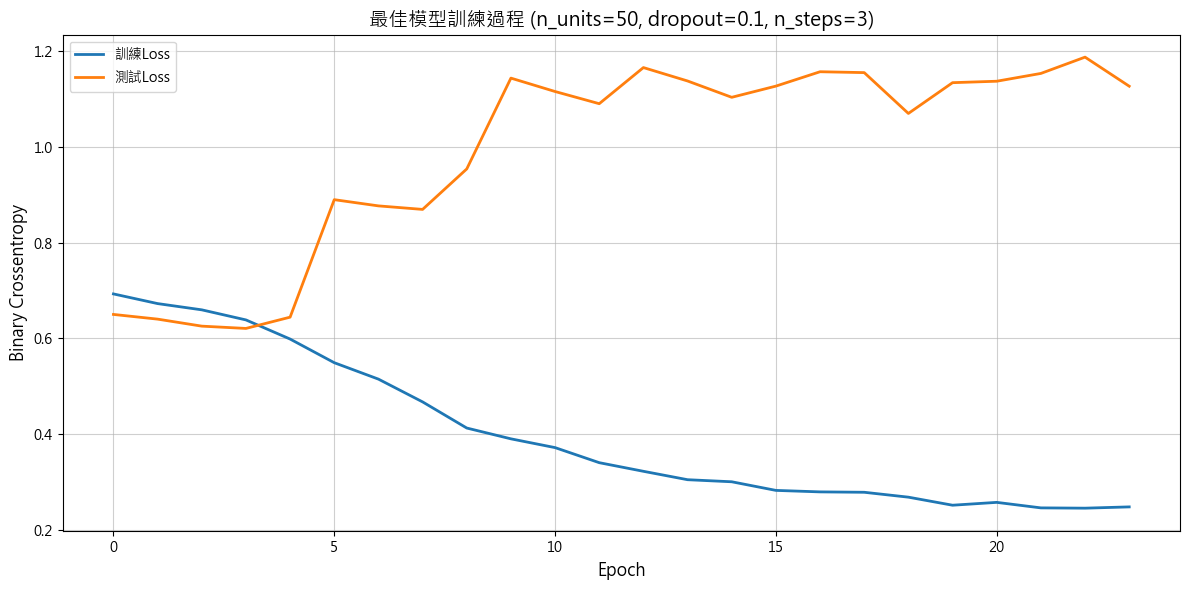


Grid Search結果已儲存至 'grid_search_results.csv'


<Figure size 600x600 with 0 Axes>

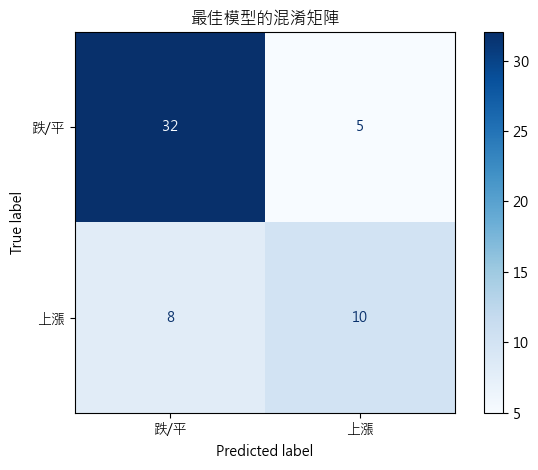


Grid Search完成!


In [15]:
import os
import random
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product
import warnings
warnings.filterwarnings('ignore')

# 設定隨機種子
os.environ['PYTHONHASHSEED'] = '42'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# 讀取資料
df = pd.read_excel(r"C:\Users\Jacky\碩一 統計資訊\失業率資料_2.xlsx")
df = df.iloc[:, 1:]

# 加入漲跌欄位：1 表上漲，0 表平或下跌
df['漲跌'] = (df['失業率(%)_合計'].diff() > 0).astype(int)
df = df.dropna().reset_index(drop=True)

# 特徵選擇（排除目標欄）
X = df.drop(columns=['失業率(%)_合計', '漲跌'])
y = df['漲跌']
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20).index.tolist()
df = df[top_features + ['漲跌']]

print(f"資料總長度: {len(df)}")
print(f"選用特徵數量: {len(top_features)}")

# 時間序列資料建構函數
def create_sequences(data, n_steps, feature_cols):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[feature_cols].iloc[i:i+n_steps].values)
        y.append(data['漲跌'].iloc[i + n_steps])
    return np.array(X), np.array(y)

# 時間序列交叉驗證函數
def time_series_cv_split(data, n_splits=3, test_size=30):
    total_len = len(data)
    fold_size = (total_len - test_size) // n_splits
    splits = []
    for i in range(n_splits):
        train_end = fold_size * (i + 1)
        val_start = train_end
        val_end = min(val_start + test_size, total_len)
        if val_end - val_start < 10:
            break
        splits.append({'train_idx': (0, train_end), 'val_idx': (val_start, val_end)})
    return splits

# 建構 LSTM 模型
def build_lstm_model(n_units, dropout_rate, n_features, n_steps):
    model = Sequential()
    model.add(LSTM(n_units,
                   activation='relu',
                   return_sequences=False,
                   input_shape=(n_steps, n_features)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Grid Search 參數
param_grid = {
    'n_units': [10, 20, 30, 50],
    'dropout_rate': [0.1, 0.3, 0.5],
    'n_steps': [3, 6, 12, 24]
}

# 標準化資料
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
feature_cols = [col for col in df_scaled.columns if col != '漲跌']

print("開始Grid Search...")
print(f"參數組合總數: {len(list(product(*param_grid.values())))}")

results = []
best_score = 0
best_params = None
best_model = None

param_combinations = list(product(*param_grid.values()))
total_combinations = len(param_combinations)

for idx, (n_units, dropout_rate, n_steps) in enumerate(param_combinations):
    print(f"\n進度: {idx+1}/{total_combinations}")
    print(f"測試參數: n_units={n_units}, dropout_rate={dropout_rate}, n_steps={n_steps}")
    
    try:
        if len(df_scaled) <= n_steps + 60:
            print("資料長度不足，跳過此參數組合")
            continue

        X, y = create_sequences(df_scaled, n_steps, feature_cols)
        if len(X) < 60:
            print("序列資料不足，跳過此參數組合")
            continue

        cv_splits = time_series_cv_split(pd.DataFrame({'idx': range(len(X))}),
                                         n_splits=3, test_size=20)
        if len(cv_splits) == 0:
            print("無法建立交叉驗證分割，跳過此參數組合")
            continue

        cv_scores = []
        for fold_idx, split in enumerate(cv_splits):
            train_start, train_end = split['train_idx']
            val_start, val_end = split['val_idx']

            X_train_fold = X[train_start:train_end]
            y_train_fold = y[train_start:train_end]
            X_val_fold = X[val_start:val_end]
            y_val_fold = y[val_start:val_end]

            if len(X_train_fold) < 10 or len(X_val_fold) < 5:
                continue

            tf.random.set_seed(42)
            model = build_lstm_model(n_units, dropout_rate, len(feature_cols), n_steps)

            early_stop = EarlyStopping(monitor='val_loss', patience=15,
                                       restore_best_weights=True, verbose=0)
            model.fit(
                X_train_fold, y_train_fold,
                batch_size=min(8, len(X_train_fold)//2),
                epochs=50,
                validation_data=(X_val_fold, y_val_fold),
                callbacks=[early_stop],
                verbose=0
            )

            y_pred_proba = model.predict(X_val_fold, verbose=0).reshape(-1)
            y_pred_class = (y_pred_proba > 0.5).astype(int)

            fold_acc = accuracy_score(y_val_fold, y_pred_class)
            fold_f1 = f1_score(y_val_fold, y_pred_class, zero_division=0)
            cv_scores.append({'accuracy': fold_acc, 'f1_score': fold_f1})

            print(f"  Fold {fold_idx+1}: Acc={fold_acc:.4f}, F1={fold_f1:.4f}")

        if len(cv_scores) == 0:
            continue

        avg_accuracy = np.mean([score['accuracy'] for score in cv_scores])
        avg_f1 = np.mean([score['f1_score'] for score in cv_scores])
        std_accuracy = np.std([score['accuracy'] for score in cv_scores])
        std_f1 = np.std([score['f1_score'] for score in cv_scores])

        combined_score = avg_f1
        result = {
            'n_units': n_units,
            'dropout_rate': dropout_rate,
            'n_steps': n_steps,
            'avg_accuracy': avg_accuracy,
            'std_accuracy': std_accuracy,
            'avg_f1': avg_f1,
            'std_f1': std_f1,
            'combined_score': combined_score
        }
        results.append(result)

        print(f"  平均結果: Acc={avg_accuracy:.4f}(±{std_accuracy:.4f}), F1={avg_f1:.4f}(±{std_f1:.4f})")

        if combined_score > best_score:
            best_score = combined_score
            best_params = {
                'n_units': n_units,
                'dropout_rate': dropout_rate,
                'n_steps': n_steps
            }
            print(f"  ★ 新的最佳參數! F1分數: {best_score:.4f}")

    except Exception as e:
        print(f"  錯誤: {str(e)}")
        continue

print("\n" + "="*80)
print("GRID SEARCH 結果")
print("="*80)

if len(results) > 0:
    results_df = pd.DataFrame(results).sort_values('combined_score', ascending=False)
    print("\n前10名參數組合:")
    print(results_df.head(10).to_string(index=False, float_format='%.4f'))

    print(f"\n最佳參數組合:")
    print(f"GRU神經元數量: {best_params['n_units']}")
    print(f"Dropout比率: {best_params['dropout_rate']}")
    print(f"時間步長: {best_params['n_steps']}")
    print(f"最佳F1分數: {best_score:.4f}")

    print("\n使用最佳參數訓練最終模型...")
    X_final, y_final = create_sequences(df_scaled, best_params['n_steps'], feature_cols)

    train_size = int(len(X_final) * 0.8)
    X_train_final = X_final[:train_size]
    y_train_final = y_final[:train_size]
    X_test_final = X_final[train_size:]
    y_test_final = y_final[train_size:]

    tf.random.set_seed(42)
    final_model = build_lstm_model(
        best_params['n_units'],
        best_params['dropout_rate'],
        len(feature_cols),
        best_params['n_steps']
    )

    early_stop = EarlyStopping(monitor='val_loss', patience=20,
                                restore_best_weights=True, verbose=0)

    final_history = final_model.fit(
        X_train_final, y_train_final,
        batch_size=8,
        epochs=100,
        validation_data=(X_test_final, y_test_final),
        callbacks=[early_stop],
        verbose=1
    )

    y_pred_proba_final = final_model.predict(X_test_final).reshape(-1)
    y_pred_class_final = (y_pred_proba_final > 0.5).astype(int)

    final_acc = accuracy_score(y_test_final, y_pred_class_final)
    final_f1 = f1_score(y_test_final, y_pred_class_final)

    print(f"\n最終模型測試結果:")
    print(f"Accuracy: {final_acc:.4f}")
    print(f"F1-score: {final_f1:.4f}")
    print("\n分類報告：")
    print(classification_report(y_test_final, y_pred_class_final,
                                target_names=["跌/平", "上漲"]))

    plt.figure(figsize=(12, 6))
    plt.plot(final_history.history["loss"], label="訓練Loss", linewidth=2)
    plt.plot(final_history.history["val_loss"], label="測試Loss", linewidth=2)
    plt.title(f"最佳模型訓練過程 (n_units={best_params['n_units']}, dropout={best_params['dropout_rate']}, n_steps={best_params['n_steps']})", fontsize=14)
    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Binary Crossentropy", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.6)
    plt.tight_layout()
    plt.show()

    results_df.to_csv('grid_search_results.csv', index=False, encoding='utf-8-sig')
    print(f"\nGrid Search結果已儲存至 'grid_search_results.csv'")
else:
    print("沒有成功的參數組合，請檢查資料或調整參數範圍")



from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 混淆矩陣計算
cm = confusion_matrix(y_test_final, y_pred_class_final)

# 顯示混淆矩陣
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["跌/平", "上漲"])
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("最佳模型的混淆矩陣")
plt.grid(False)
plt.tight_layout()
plt.show()


print("\nGrid Search完成!")


## 三種失業率預測與實際的結果比對

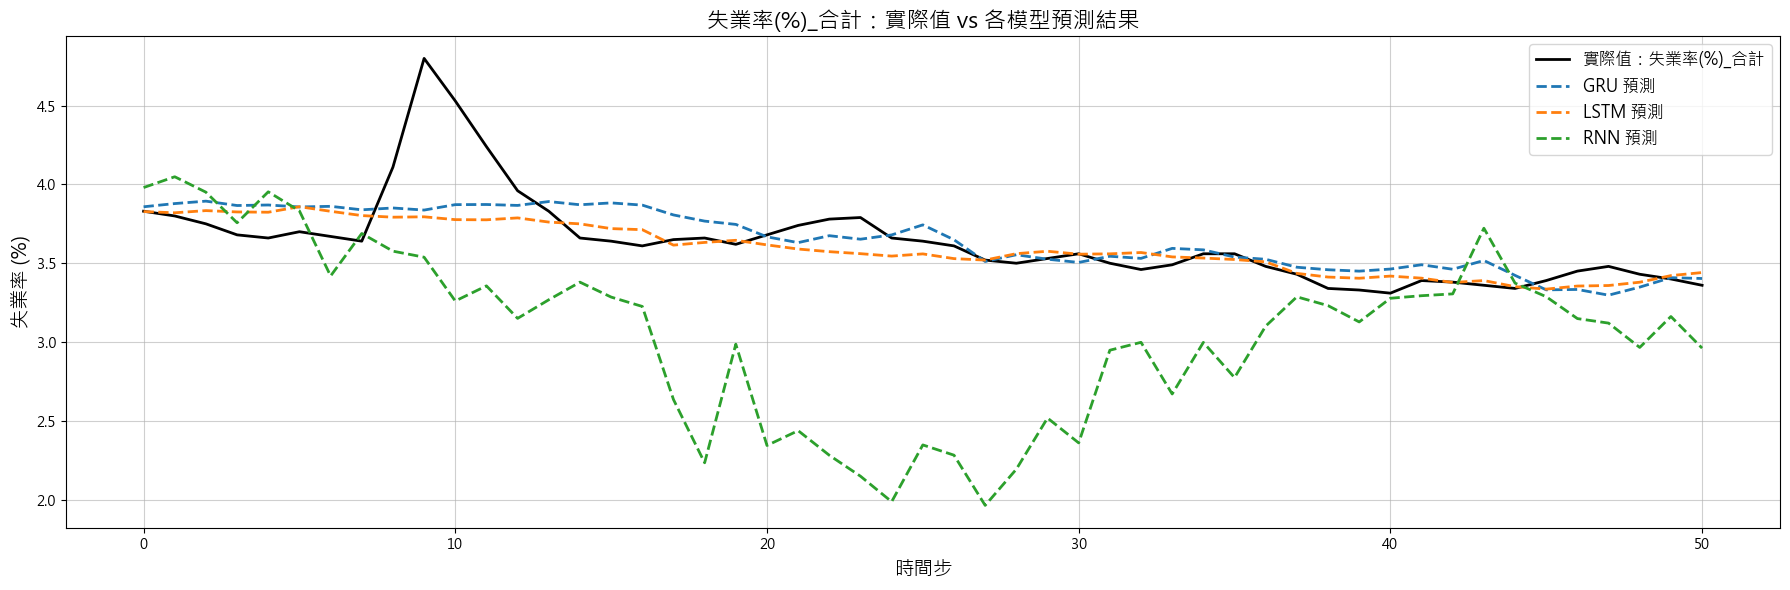

In [14]:


# ------------------- 三模型預測結果整合 -------------------
plt.figure(figsize=(18, 6))

# 實際值
plt.plot(y_test_original, label='實際值：失業率(%)_合計', linewidth=2, color='black')

# 三種模型預測結果
plt.plot(gru_pred_original, label='GRU 預測', linestyle='--', linewidth=2)
plt.plot(lstm_pred_original, label='LSTM 預測', linestyle='--', linewidth=2)
plt.plot(rnn_pred_original, label='RNN 預測', linestyle='--', linewidth=2)

# 圖表樣式
plt.title("失業率(%)_合計：實際值 vs 各模型預測結果", fontsize=16)
plt.xlabel("時間步", fontsize=14)
plt.ylabel("失業率 (%)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()
